## 데이터 불러오기 (Read Data) ONLY_NEW 해보기

In [4]:
import pandas as pd
import numpy as np
import os
import warnings
warnings.filterwarnings('ignore')


from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, StratifiedKFold, KFold,GroupKFold
from sklearn.metrics import f1_score
import lightgbm as lgb
# from lightgbm import LGBMClassifier as lgb

# import optuna.integration.lightgbm as lgb

# from imblearn.over_sampling import SMOTE
SEED = 1996

In [5]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from plotnine import *

In [6]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, recall_score
import xgboost as xgb

In [7]:
import pandas as pd
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
submission = pd.read_csv('sample_submission.csv')

In [8]:
train.loc[train['income']=='>50K','income'] = 1
train.loc[train['income']=='<=50K','income'] = 0

In [9]:
test['income']=0

## 데이터 구조 확인 (Checking the shapes of data)

In [10]:
all_df = pd.concat([train, test])
all_df.reset_index(inplace = True, drop = True)
del(all_df['id'])

#학습데이터 1
d1 = all_df.copy()

In [8]:
all_df['age_group'] = all_df['age'].astype(str)
all_df['age_group'] = all_df['age_group'].str[0]
#학습데이터 2
d2 = all_df.copy()

In [9]:
all_df['age_education'] = all_df['age_group'].apply(str) + '_' + all_df['education'].apply(str)
#학습데이터 3
d3 = all_df.copy()

In [10]:
all_df['age_occupation'] = all_df['age_group'].apply(str) + '_' + all_df['occupation'].apply(str)
#학습 데이터 4
d4 = all_df.copy()

In [11]:
# del(all_df['age_group'])
# del(all_df['education'])

In [12]:
# #87985 feature#
all_df['gain-loss'] = all_df['capital_gain'] - all_df['capital_loss']
d5 = all_df.copy()
all_df['work'] = all_df['workclass'].apply(str) + '_' + all_df['occupation'].apply(str)
d6 = all_df.copy()
all_df['human'] = all_df['race'].apply(str) + '_' + all_df['sex'].apply(str)
d7 = all_df.copy()
all_df['relationshipsex'] = all_df['relationship'].apply(str) + '_' + all_df['sex'].apply(str)
d8 = all_df.copy()
all_df['marital_statussex'] = all_df['marital_status'].apply(str) + '_' + all_df['sex'].apply(str)
d9 = all_df.copy()

# all_df.loc[all_df['native_country'] == '?', 'native_country'] = np.nan
# all_df.loc[all_df['workclass'] == '?', 'native_country'] = np.nan
# all_df.loc[all_df['occupation'] == '?', 'native_country'] = np.nan
log_var = ['capital_gain','gain-loss','fnlwgt']
for col in log_var:
    all_df[col] = np.log1p(all_df[col])
d10 = all_df.copy()

In [13]:
data = [d1,d2,d3,d4,d5,d6,d7,d8,d9,d10]

In [14]:
t =11
name = []
name2 = []
cnt = 0
for i in range(len(data)-1):
    for j in range(i+1,len(data)):
        name.append("d"+str(t))
        print("d"+str(t))
        t+=1
        df_new = pd.merge(data[i],data[j])
        name[cnt] = df_new.copy()
        cnt+=1
        
        
        

d11
d12
d13
d14
d15
d16
d17
d18
d19
d20
d21
d22
d23
d24
d25
d26
d27
d28
d29
d30
d31
d32
d33
d34
d35
d36
d37
d38
d39
d40
d41
d42
d43
d44
d45
d46
d47
d48
d49
d50
d51
d52
d53
d54
d55


In [70]:
new_data = data+name

In [71]:
df_new = pd.merge(d1,d2)

In [72]:
d1.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income'],
      dtype='object')

In [73]:
df_new.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income', 'age_group'],
      dtype='object')

In [74]:
for i in data:
    i.columns

시드리스트 :  [0, 5, 20, 45, 80, 125, 180, 245, 320, 405, 500, 605, 720, 845, 980, 1125, 1280, 1445, 1620, 1805, 2000, 2205, 2420, 2645, 2880, 3125, 3380, 3645, 3920, 4205, 4500, 4805, 5120, 5445, 5780, 6125, 6480, 6845, 7220, 7605, 8000, 8405, 8820, 9245, 9680, 10125, 10580, 11045, 11520, 12005, 12500, 13005, 13520, 14045, 14580, 15125, 15680, 16245, 16820, 17405, 18000, 18605, 19220, 19845, 20480, 21125, 21780, 22445, 23120, 23805, 24500, 25205, 25920, 26645, 27380, 28125, 28880, 29645, 30420, 31205, 32000, 32805, 33620, 34445, 35280, 36125, 36980, 37845, 38720, 39605, 40500, 41405, 42320, 43245, 44180, 45125, 46080, 47045, 48020, 49005, 50000, 51005, 52020, 53045, 54080, 55125, 56180, 57245, 58320, 59405, 60500, 61605, 62720, 63845, 64980, 66125, 67280, 68445, 69620, 70805, 72000, 73205, 74420, 75645, 76880, 78125, 79380, 80645, 81920, 83205, 84500, 85805, 87120, 88445, 89780, 91125, 92480, 93845, 95220, 96605, 98000, 99405, 100820, 102245, 103680, 105125, 106580, 108045, 109520, 111005,

######### 1 번째 데이터 학습 결과 #########


SEED는 :     0   F1스코어는 : 0.70548   최대 스코어는 : 0.70548   지금까지 평균스코어는 : 0.70548
SEED는 :     5   F1스코어는 : 0.67534   최대 스코어는 : 0.70548   지금까지 평균스코어는 : 0.69041
SEED는 :    20   F1스코어는 : 0.70873   최대 스코어는 : 0.70873   지금까지 평균스코어는 : 0.69651
SEED는 :    45   F1스코어는 : 0.69143   최대 스코어는 : 0.70873   지금까지 평균스코어는 : 0.69524
SEED는 :    80   F1스코어는 : 0.71500   최대 스코어는 : 0.71500   지금까지 평균스코어는 : 0.69920
SEED는 :   125   F1스코어는 : 0.69950   최대 스코어는 : 0.71500   지금까지 평균스코어는 : 0.69925
SEED는 :   180   F1스코어는 : 0.68826   최대 스코어는 : 0.71500   지금까지 평균스코어는 : 0.69768
SEED는 :   245   F1스코어는 : 0.69700   최대 스코어는 : 0.71500   지금까지 평균스코어는 : 0.69759
SEED는 :   320   F1스코어는 : 0.69808   최대 스코어는 : 0.71500   지금까지 평균스코어는 : 0.69765
SEED는 :   405   F1스코어는 : 0.70091   최대 스코어는 : 0.71500   지금까지 평균스코어는 : 0.69797
SEED는 :   500   F1스코어는 : 0.69402   최대 스코어는 : 0.71500   지금까지 평균스코어는 : 0.69761
SEED는 :   605   F1스코어는 : 0.68221   최대 스코어는 : 0.71500   지금까지 평균스코어는 : 0.69633
SEED는 :   720   F1스코어는 : 0.68099   최대 스코어는 : 0.71500   지금까지 평균스코어는 : 0.69515

SEED는 : 57245   F1스코어는 : 0.68700   최대 스코어는 : 0.71644   지금까지 평균스코어는 : 0.69090
SEED는 : 58320   F1스코어는 : 0.69551   최대 스코어는 : 0.71644   지금까지 평균스코어는 : 0.69094
SEED는 : 59405   F1스코어는 : 0.67477   최대 스코어는 : 0.71644   지금까지 평균스코어는 : 0.69079
SEED는 : 60500   F1스코어는 : 0.68713   최대 스코어는 : 0.71644   지금까지 평균스코어는 : 0.69076
SEED는 : 61605   F1스코어는 : 0.70343   최대 스코어는 : 0.71644   지금까지 평균스코어는 : 0.69087
SEED는 : 62720   F1스코어는 : 0.69440   최대 스코어는 : 0.71644   지금까지 평균스코어는 : 0.69090
SEED는 : 63845   F1스코어는 : 0.70894   최대 스코어는 : 0.71644   지금까지 평균스코어는 : 0.69106
SEED는 : 64980   F1스코어는 : 0.70358   최대 스코어는 : 0.71644   지금까지 평균스코어는 : 0.69117
SEED는 : 66125   F1스코어는 : 0.70149   최대 스코어는 : 0.71644   지금까지 평균스코어는 : 0.69126
SEED는 : 67280   F1스코어는 : 0.69528   최대 스코어는 : 0.71644   지금까지 평균스코어는 : 0.69129
SEED는 : 68445   F1스코어는 : 0.68405   최대 스코어는 : 0.71644   지금까지 평균스코어는 : 0.69123
SEED는 : 69620   F1스코어는 : 0.67920   최대 스코어는 : 0.71644   지금까지 평균스코어는 : 0.69113
SEED는 : 70805   F1스코어는 : 0.69813   최대 스코어는 : 0.71644   지금까지 평균스코어는 : 0.69119

SEED는 : 226845   F1스코어는 : 0.69374   최대 스코어는 : 0.71644   지금까지 평균스코어는 : 0.69037
SEED는 : 228980   F1스코어는 : 0.69269   최대 스코어는 : 0.71644   지금까지 평균스코어는 : 0.69038
SEED는 : 231125   F1스코어는 : 0.68537   최대 스코어는 : 0.71644   지금까지 평균스코어는 : 0.69036
SEED는 : 233280   F1스코어는 : 0.68000   최대 스코어는 : 0.71644   지금까지 평균스코어는 : 0.69031
SEED는 : 235445   F1스코어는 : 0.69351   최대 스코어는 : 0.71644   지금까지 평균스코어는 : 0.69032
SEED는 : 237620   F1스코어는 : 0.67672   최대 스코어는 : 0.71644   지금까지 평균스코어는 : 0.69026
SEED는 : 239805   F1스코어는 : 0.68798   최대 스코어는 : 0.71644   지금까지 평균스코어는 : 0.69025
SEED는 : 242000   F1스코어는 : 0.68115   최대 스코어는 : 0.71644   지금까지 평균스코어는 : 0.69021
SEED는 : 244205   F1스코어는 : 0.68664   최대 스코어는 : 0.71644   지금까지 평균스코어는 : 0.69019
SEED는 : 246420   F1스코어는 : 0.69199   최대 스코어는 : 0.71644   지금까지 평균스코어는 : 0.69020
SEED는 : 248645   F1스코어는 : 0.70090   최대 스코어는 : 0.71644   지금까지 평균스코어는 : 0.69025
SEED는 : 250880   F1스코어는 : 0.70653   최대 스코어는 : 0.71644   지금까지 평균스코어는 : 0.69032
SEED는 : 253125   F1스코어는 : 0.68972   최대 스코어는 : 0.71644   지금까지 평균스

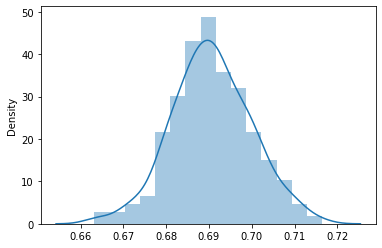

######### 2 번째 데이터 학습 결과 #########


SEED는 :     0   F1스코어는 : 0.70442   최대 스코어는 : 0.70442   지금까지 평균스코어는 : 0.70442
SEED는 :     5   F1스코어는 : 0.68719   최대 스코어는 : 0.70442   지금까지 평균스코어는 : 0.69580
SEED는 :    20   F1스코어는 : 0.69959   최대 스코어는 : 0.70442   지금까지 평균스코어는 : 0.69707
SEED는 :    45   F1스코어는 : 0.70687   최대 스코어는 : 0.70687   지금까지 평균스코어는 : 0.69952
SEED는 :    80   F1스코어는 : 0.70839   최대 스코어는 : 0.70839   지금까지 평균스코어는 : 0.70129
SEED는 :   125   F1스코어는 : 0.70383   최대 스코어는 : 0.70839   지금까지 평균스코어는 : 0.70171
SEED는 :   180   F1스코어는 : 0.68190   최대 스코어는 : 0.70839   지금까지 평균스코어는 : 0.69888
SEED는 :   245   F1스코어는 : 0.68253   최대 스코어는 : 0.70839   지금까지 평균스코어는 : 0.69684
SEED는 :   320   F1스코어는 : 0.69744   최대 스코어는 : 0.70839   지금까지 평균스코어는 : 0.69691
SEED는 :   405   F1스코어는 : 0.70037   최대 스코어는 : 0.70839   지금까지 평균스코어는 : 0.69725
SEED는 :   500   F1스코어는 : 0.70358   최대 스코어는 : 0.70839   지금까지 평균스코어는 : 0.69783
SEED는 :   605   F1스코어는 : 0.68562   최대 스코어는 : 0.70839   지금까지 평균스코어는 : 0.69681
SEED는 :   720   F1스코어는 : 0.68148   최대 스코어는 : 0.70839   지금까지 평균스코어는 : 0.69563

SEED는 : 57245   F1스코어는 : 0.68365   최대 스코어는 : 0.71679   지금까지 평균스코어는 : 0.69149
SEED는 : 58320   F1스코어는 : 0.70341   최대 스코어는 : 0.71679   지금까지 평균스코어는 : 0.69160
SEED는 : 59405   F1스코어는 : 0.67662   최대 스코어는 : 0.71679   지금까지 평균스코어는 : 0.69146
SEED는 : 60500   F1스코어는 : 0.69381   최대 스코어는 : 0.71679   지금까지 평균스코어는 : 0.69148
SEED는 : 61605   F1스코어는 : 0.70348   최대 스코어는 : 0.71679   지금까지 평균스코어는 : 0.69159
SEED는 : 62720   F1스코어는 : 0.69784   최대 스코어는 : 0.71679   지금까지 평균스코어는 : 0.69164
SEED는 : 63845   F1스코어는 : 0.70123   최대 스코어는 : 0.71679   지금까지 평균스코어는 : 0.69173
SEED는 : 64980   F1스코어는 : 0.71494   최대 스코어는 : 0.71679   지금까지 평균스코어는 : 0.69193
SEED는 : 66125   F1스코어는 : 0.69621   최대 스코어는 : 0.71679   지금까지 평균스코어는 : 0.69197
SEED는 : 67280   F1스코어는 : 0.68880   최대 스코어는 : 0.71679   지금까지 평균스코어는 : 0.69194
SEED는 : 68445   F1스코어는 : 0.69208   최대 스코어는 : 0.71679   지금까지 평균스코어는 : 0.69194
SEED는 : 69620   F1스코어는 : 0.67880   최대 스코어는 : 0.71679   지금까지 평균스코어는 : 0.69183
SEED는 : 70805   F1스코어는 : 0.69150   최대 스코어는 : 0.71679   지금까지 평균스코어는 : 0.69183

SEED는 : 226845   F1스코어는 : 0.69765   최대 스코어는 : 0.71679   지금까지 평균스코어는 : 0.69057
SEED는 : 228980   F1스코어는 : 0.69005   최대 스코어는 : 0.71679   지금까지 평균스코어는 : 0.69056
SEED는 : 231125   F1스코어는 : 0.68137   최대 스코어는 : 0.71679   지금까지 평균스코어는 : 0.69052
SEED는 : 233280   F1스코어는 : 0.67551   최대 스코어는 : 0.71679   지금까지 평균스코어는 : 0.69045
SEED는 : 235445   F1스코어는 : 0.68439   최대 스코어는 : 0.71679   지금까지 평균스코어는 : 0.69042
SEED는 : 237620   F1스코어는 : 0.67528   최대 스코어는 : 0.71679   지금까지 평균스코어는 : 0.69035
SEED는 : 239805   F1스코어는 : 0.68652   최대 스코어는 : 0.71679   지금까지 평균스코어는 : 0.69034
SEED는 : 242000   F1스코어는 : 0.68146   최대 스코어는 : 0.71679   지금까지 평균스코어는 : 0.69030
SEED는 : 244205   F1스코어는 : 0.68606   최대 스코어는 : 0.71679   지금까지 평균스코어는 : 0.69028
SEED는 : 246420   F1스코어는 : 0.68825   최대 스코어는 : 0.71679   지금까지 평균스코어는 : 0.69027
SEED는 : 248645   F1스코어는 : 0.69438   최대 스코어는 : 0.71679   지금까지 평균스코어는 : 0.69029
SEED는 : 250880   F1스코어는 : 0.71459   최대 스코어는 : 0.71679   지금까지 평균스코어는 : 0.69039
SEED는 : 253125   F1스코어는 : 0.67682   최대 스코어는 : 0.71679   지금까지 평균스

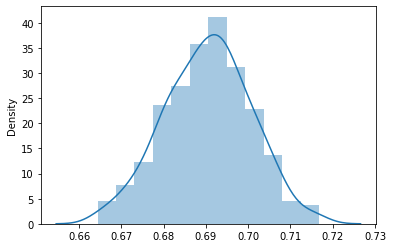

######### 3 번째 데이터 학습 결과 #########


SEED는 :     0   F1스코어는 : 0.70415   최대 스코어는 : 0.70415   지금까지 평균스코어는 : 0.70415
SEED는 :     5   F1스코어는 : 0.67761   최대 스코어는 : 0.70415   지금까지 평균스코어는 : 0.69088
SEED는 :    20   F1스코어는 : 0.69468   최대 스코어는 : 0.70415   지금까지 평균스코어는 : 0.69215
SEED는 :    45   F1스코어는 : 0.70598   최대 스코어는 : 0.70598   지금까지 평균스코어는 : 0.69561
SEED는 :    80   F1스코어는 : 0.71447   최대 스코어는 : 0.71447   지금까지 평균스코어는 : 0.69938
SEED는 :   125   F1스코어는 : 0.70079   최대 스코어는 : 0.71447   지금까지 평균스코어는 : 0.69961
SEED는 :   180   F1스코어는 : 0.68554   최대 스코어는 : 0.71447   지금까지 평균스코어는 : 0.69760
SEED는 :   245   F1스코어는 : 0.68606   최대 스코어는 : 0.71447   지금까지 평균스코어는 : 0.69616
SEED는 :   320   F1스코어는 : 0.69996   최대 스코어는 : 0.71447   지금까지 평균스코어는 : 0.69658
SEED는 :   405   F1스코어는 : 0.69544   최대 스코어는 : 0.71447   지금까지 평균스코어는 : 0.69647
SEED는 :   500   F1스코어는 : 0.70553   최대 스코어는 : 0.71447   지금까지 평균스코어는 : 0.69729
SEED는 :   605   F1스코어는 : 0.68596   최대 스코어는 : 0.71447   지금까지 평균스코어는 : 0.69635
SEED는 :   720   F1스코어는 : 0.68399   최대 스코어는 : 0.71447   지금까지 평균스코어는 : 0.69540

SEED는 : 57245   F1스코어는 : 0.68080   최대 스코어는 : 0.71447   지금까지 평균스코어는 : 0.69018
SEED는 : 58320   F1스코어는 : 0.70117   최대 스코어는 : 0.71447   지금까지 평균스코어는 : 0.69028
SEED는 : 59405   F1스코어는 : 0.67587   최대 스코어는 : 0.71447   지금까지 평균스코어는 : 0.69015
SEED는 : 60500   F1스코어는 : 0.68363   최대 스코어는 : 0.71447   지금까지 평균스코어는 : 0.69009
SEED는 : 61605   F1스코어는 : 0.70141   최대 스코어는 : 0.71447   지금까지 평균스코어는 : 0.69019
SEED는 : 62720   F1스코어는 : 0.70325   최대 스코어는 : 0.71447   지금까지 평균스코어는 : 0.69031
SEED는 : 63845   F1스코어는 : 0.69979   최대 스코어는 : 0.71447   지금까지 평균스코어는 : 0.69039
SEED는 : 64980   F1스코어는 : 0.71517   최대 스코어는 : 0.71517   지금까지 평균스코어는 : 0.69060
SEED는 : 66125   F1스코어는 : 0.69461   최대 스코어는 : 0.71517   지금까지 평균스코어는 : 0.69064
SEED는 : 67280   F1스코어는 : 0.69128   최대 스코어는 : 0.71517   지금까지 평균스코어는 : 0.69064
SEED는 : 68445   F1스코어는 : 0.68704   최대 스코어는 : 0.71517   지금까지 평균스코어는 : 0.69061
SEED는 : 69620   F1스코어는 : 0.68083   최대 스코어는 : 0.71517   지금까지 평균스코어는 : 0.69053
SEED는 : 70805   F1스코어는 : 0.70685   최대 스코어는 : 0.71517   지금까지 평균스코어는 : 0.69067

SEED는 : 226845   F1스코어는 : 0.70059   최대 스코어는 : 0.71517   지금까지 평균스코어는 : 0.68997
SEED는 : 228980   F1스코어는 : 0.70148   최대 스코어는 : 0.71517   지금까지 평균스코어는 : 0.69002
SEED는 : 231125   F1스코어는 : 0.69647   최대 스코어는 : 0.71517   지금까지 평균스코어는 : 0.69005
SEED는 : 233280   F1스코어는 : 0.67260   최대 스코어는 : 0.71517   지금까지 평균스코어는 : 0.68997
SEED는 : 235445   F1스코어는 : 0.68472   최대 스코어는 : 0.71517   지금까지 평균스코어는 : 0.68995
SEED는 : 237620   F1스코어는 : 0.69041   최대 스코어는 : 0.71517   지금까지 평균스코어는 : 0.68995
SEED는 : 239805   F1스코어는 : 0.69618   최대 스코어는 : 0.71517   지금까지 평균스코어는 : 0.68998
SEED는 : 242000   F1스코어는 : 0.67645   최대 스코어는 : 0.71517   지금까지 평균스코어는 : 0.68992
SEED는 : 244205   F1스코어는 : 0.67750   최대 스코어는 : 0.71517   지금까지 평균스코어는 : 0.68986
SEED는 : 246420   F1스코어는 : 0.70151   최대 스코어는 : 0.71517   지금까지 평균스코어는 : 0.68991
SEED는 : 248645   F1스코어는 : 0.69676   최대 스코어는 : 0.71517   지금까지 평균스코어는 : 0.68994
SEED는 : 250880   F1스코어는 : 0.71134   최대 스코어는 : 0.71517   지금까지 평균스코어는 : 0.69004
SEED는 : 253125   F1스코어는 : 0.69043   최대 스코어는 : 0.71517   지금까지 평균스

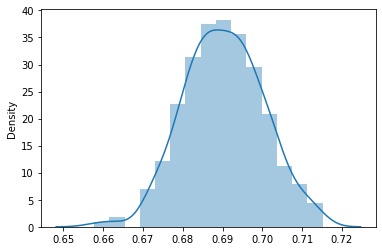

######### 4 번째 데이터 학습 결과 #########


SEED는 :     0   F1스코어는 : 0.70457   최대 스코어는 : 0.70457   지금까지 평균스코어는 : 0.70457
SEED는 :     5   F1스코어는 : 0.68395   최대 스코어는 : 0.70457   지금까지 평균스코어는 : 0.69426
SEED는 :    20   F1스코어는 : 0.69704   최대 스코어는 : 0.70457   지금까지 평균스코어는 : 0.69519
SEED는 :    45   F1스코어는 : 0.71369   최대 스코어는 : 0.71369   지금까지 평균스코어는 : 0.69981
SEED는 :    80   F1스코어는 : 0.70758   최대 스코어는 : 0.71369   지금까지 평균스코어는 : 0.70136
SEED는 :   125   F1스코어는 : 0.70290   최대 스코어는 : 0.71369   지금까지 평균스코어는 : 0.70162
SEED는 :   180   F1스코어는 : 0.68621   최대 스코어는 : 0.71369   지금까지 평균스코어는 : 0.69942
SEED는 :   245   F1스코어는 : 0.68848   최대 스코어는 : 0.71369   지금까지 평균스코어는 : 0.69805
SEED는 :   320   F1스코어는 : 0.69878   최대 스코어는 : 0.71369   지금까지 평균스코어는 : 0.69813
SEED는 :   405   F1스코어는 : 0.70324   최대 스코어는 : 0.71369   지금까지 평균스코어는 : 0.69864
SEED는 :   500   F1스코어는 : 0.70166   최대 스코어는 : 0.71369   지금까지 평균스코어는 : 0.69892
SEED는 :   605   F1스코어는 : 0.69550   최대 스코어는 : 0.71369   지금까지 평균스코어는 : 0.69863
SEED는 :   720   F1스코어는 : 0.68222   최대 스코어는 : 0.71369   지금까지 평균스코어는 : 0.69737

SEED는 : 57245   F1스코어는 : 0.67771   최대 스코어는 : 0.71393   지금까지 평균스코어는 : 0.69093
SEED는 : 58320   F1스코어는 : 0.69958   최대 스코어는 : 0.71393   지금까지 평균스코어는 : 0.69101
SEED는 : 59405   F1스코어는 : 0.67591   최대 스코어는 : 0.71393   지금까지 평균스코어는 : 0.69087
SEED는 : 60500   F1스코어는 : 0.68107   최대 스코어는 : 0.71393   지금까지 평균스코어는 : 0.69078
SEED는 : 61605   F1스코어는 : 0.70317   최대 스코어는 : 0.71393   지금까지 평균스코어는 : 0.69089
SEED는 : 62720   F1스코어는 : 0.69841   최대 스코어는 : 0.71393   지금까지 평균스코어는 : 0.69096
SEED는 : 63845   F1스코어는 : 0.70051   최대 스코어는 : 0.71393   지금까지 평균스코어는 : 0.69104
SEED는 : 64980   F1스코어는 : 0.70436   최대 스코어는 : 0.71393   지금까지 평균스코어는 : 0.69116
SEED는 : 66125   F1스코어는 : 0.69674   최대 스코어는 : 0.71393   지금까지 평균스코어는 : 0.69120
SEED는 : 67280   F1스코어는 : 0.68857   최대 스코어는 : 0.71393   지금까지 평균스코어는 : 0.69118
SEED는 : 68445   F1스코어는 : 0.68289   최대 스코어는 : 0.71393   지금까지 평균스코어는 : 0.69111
SEED는 : 69620   F1스코어는 : 0.68412   최대 스코어는 : 0.71393   지금까지 평균스코어는 : 0.69105
SEED는 : 70805   F1스코어는 : 0.69419   최대 스코어는 : 0.71393   지금까지 평균스코어는 : 0.69108

SEED는 : 226845   F1스코어는 : 0.69208   최대 스코어는 : 0.71393   지금까지 평균스코어는 : 0.69036
SEED는 : 228980   F1스코어는 : 0.70095   최대 스코어는 : 0.71393   지금까지 평균스코어는 : 0.69041
SEED는 : 231125   F1스코어는 : 0.68486   최대 스코어는 : 0.71393   지금까지 평균스코어는 : 0.69039
SEED는 : 233280   F1스코어는 : 0.67341   최대 스코어는 : 0.71393   지금까지 평균스코어는 : 0.69031
SEED는 : 235445   F1스코어는 : 0.67734   최대 스코어는 : 0.71393   지금까지 평균스코어는 : 0.69025
SEED는 : 237620   F1스코어는 : 0.67503   최대 스코어는 : 0.71393   지금까지 평균스코어는 : 0.69018
SEED는 : 239805   F1스코어는 : 0.69080   최대 스코어는 : 0.71393   지금까지 평균스코어는 : 0.69018
SEED는 : 242000   F1스코어는 : 0.67646   최대 스코어는 : 0.71393   지금까지 평균스코어는 : 0.69012
SEED는 : 244205   F1스코어는 : 0.68625   최대 스코어는 : 0.71393   지금까지 평균스코어는 : 0.69010
SEED는 : 246420   F1스코어는 : 0.69572   최대 스코어는 : 0.71393   지금까지 평균스코어는 : 0.69013
SEED는 : 248645   F1스코어는 : 0.69897   최대 스코어는 : 0.71393   지금까지 평균스코어는 : 0.69017
SEED는 : 250880   F1스코어는 : 0.70583   최대 스코어는 : 0.71393   지금까지 평균스코어는 : 0.69024
SEED는 : 253125   F1스코어는 : 0.68812   최대 스코어는 : 0.71393   지금까지 평균스

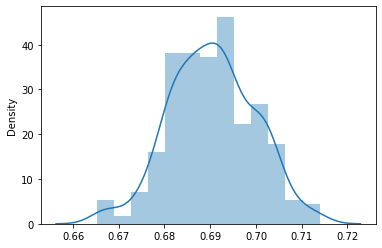

######### 5 번째 데이터 학습 결과 #########


SEED는 :     0   F1스코어는 : 0.70639   최대 스코어는 : 0.70639   지금까지 평균스코어는 : 0.70639
SEED는 :     5   F1스코어는 : 0.68403   최대 스코어는 : 0.70639   지금까지 평균스코어는 : 0.69521
SEED는 :    20   F1스코어는 : 0.69637   최대 스코어는 : 0.70639   지금까지 평균스코어는 : 0.69560
SEED는 :    45   F1스코어는 : 0.70672   최대 스코어는 : 0.70672   지금까지 평균스코어는 : 0.69838
SEED는 :    80   F1스코어는 : 0.70935   최대 스코어는 : 0.70935   지금까지 평균스코어는 : 0.70057
SEED는 :   125   F1스코어는 : 0.69959   최대 스코어는 : 0.70935   지금까지 평균스코어는 : 0.70041
SEED는 :   180   F1스코어는 : 0.69595   최대 스코어는 : 0.70935   지금까지 평균스코어는 : 0.69977
SEED는 :   245   F1스코어는 : 0.68930   최대 스코어는 : 0.70935   지금까지 평균스코어는 : 0.69846
SEED는 :   320   F1스코어는 : 0.70366   최대 스코어는 : 0.70935   지금까지 평균스코어는 : 0.69904
SEED는 :   405   F1스코어는 : 0.70387   최대 스코어는 : 0.70935   지금까지 평균스코어는 : 0.69952
SEED는 :   500   F1스코어는 : 0.70668   최대 스코어는 : 0.70935   지금까지 평균스코어는 : 0.70017
SEED는 :   605   F1스코어는 : 0.69254   최대 스코어는 : 0.70935   지금까지 평균스코어는 : 0.69954
SEED는 :   720   F1스코어는 : 0.68419   최대 스코어는 : 0.70935   지금까지 평균스코어는 : 0.69836

SEED는 : 57245   F1스코어는 : 0.68591   최대 스코어는 : 0.71375   지금까지 평균스코어는 : 0.69084
SEED는 : 58320   F1스코어는 : 0.70025   최대 스코어는 : 0.71375   지금까지 평균스코어는 : 0.69093
SEED는 : 59405   F1스코어는 : 0.68267   최대 스코어는 : 0.71375   지금까지 평균스코어는 : 0.69085
SEED는 : 60500   F1스코어는 : 0.68774   최대 스코어는 : 0.71375   지금까지 평균스코어는 : 0.69082
SEED는 : 61605   F1스코어는 : 0.70506   최대 스코어는 : 0.71375   지금까지 평균스코어는 : 0.69095
SEED는 : 62720   F1스코어는 : 0.70365   최대 스코어는 : 0.71375   지금까지 평균스코어는 : 0.69106
SEED는 : 63845   F1스코어는 : 0.69865   최대 스코어는 : 0.71375   지금까지 평균스코어는 : 0.69113
SEED는 : 64980   F1스코어는 : 0.70805   최대 스코어는 : 0.71375   지금까지 평균스코어는 : 0.69128
SEED는 : 66125   F1스코어는 : 0.69639   최대 스코어는 : 0.71375   지금까지 평균스코어는 : 0.69132
SEED는 : 67280   F1스코어는 : 0.69465   최대 스코어는 : 0.71375   지금까지 평균스코어는 : 0.69135
SEED는 : 68445   F1스코어는 : 0.68542   최대 스코어는 : 0.71375   지금까지 평균스코어는 : 0.69130
SEED는 : 69620   F1스코어는 : 0.68796   최대 스코어는 : 0.71375   지금까지 평균스코어는 : 0.69127
SEED는 : 70805   F1스코어는 : 0.70191   최대 스코어는 : 0.71375   지금까지 평균스코어는 : 0.69136

SEED는 : 226845   F1스코어는 : 0.69086   최대 스코어는 : 0.71375   지금까지 평균스코어는 : 0.69036
SEED는 : 228980   F1스코어는 : 0.69658   최대 스코어는 : 0.71375   지금까지 평균스코어는 : 0.69039
SEED는 : 231125   F1스코어는 : 0.68367   최대 스코어는 : 0.71375   지금까지 평균스코어는 : 0.69036
SEED는 : 233280   F1스코어는 : 0.67653   최대 스코어는 : 0.71375   지금까지 평균스코어는 : 0.69030
SEED는 : 235445   F1스코어는 : 0.69067   최대 스코어는 : 0.71375   지금까지 평균스코어는 : 0.69030
SEED는 : 237620   F1스코어는 : 0.68117   최대 스코어는 : 0.71375   지금까지 평균스코어는 : 0.69026
SEED는 : 239805   F1스코어는 : 0.68632   최대 스코어는 : 0.71375   지금까지 평균스코어는 : 0.69024
SEED는 : 242000   F1스코어는 : 0.67537   최대 스코어는 : 0.71375   지금까지 평균스코어는 : 0.69017
SEED는 : 244205   F1스코어는 : 0.68809   최대 스코어는 : 0.71375   지금까지 평균스코어는 : 0.69016
SEED는 : 246420   F1스코어는 : 0.68425   최대 스코어는 : 0.71375   지금까지 평균스코어는 : 0.69014
SEED는 : 248645   F1스코어는 : 0.69680   최대 스코어는 : 0.71375   지금까지 평균스코어는 : 0.69017
SEED는 : 250880   F1스코어는 : 0.70914   최대 스코어는 : 0.71375   지금까지 평균스코어는 : 0.69025
SEED는 : 253125   F1스코어는 : 0.68658   최대 스코어는 : 0.71375   지금까지 평균스

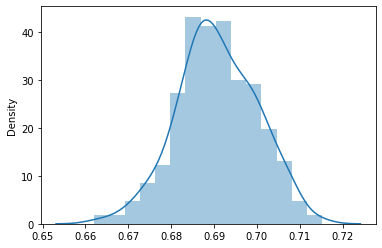

######### 6 번째 데이터 학습 결과 #########


SEED는 :     0   F1스코어는 : 0.70888   최대 스코어는 : 0.70888   지금까지 평균스코어는 : 0.70888
SEED는 :     5   F1스코어는 : 0.68384   최대 스코어는 : 0.70888   지금까지 평균스코어는 : 0.69636
SEED는 :    20   F1스코어는 : 0.68948   최대 스코어는 : 0.70888   지금까지 평균스코어는 : 0.69407
SEED는 :    45   F1스코어는 : 0.70504   최대 스코어는 : 0.70888   지금까지 평균스코어는 : 0.69681
SEED는 :    80   F1스코어는 : 0.71356   최대 스코어는 : 0.71356   지금까지 평균스코어는 : 0.70016
SEED는 :   125   F1스코어는 : 0.69933   최대 스코어는 : 0.71356   지금까지 평균스코어는 : 0.70002
SEED는 :   180   F1스코어는 : 0.68351   최대 스코어는 : 0.71356   지금까지 평균스코어는 : 0.69766
SEED는 :   245   F1스코어는 : 0.68868   최대 스코어는 : 0.71356   지금까지 평균스코어는 : 0.69654
SEED는 :   320   F1스코어는 : 0.70418   최대 스코어는 : 0.71356   지금까지 평균스코어는 : 0.69739
SEED는 :   405   F1스코어는 : 0.69340   최대 스코어는 : 0.71356   지금까지 평균스코어는 : 0.69699
SEED는 :   500   F1스코어는 : 0.70266   최대 스코어는 : 0.71356   지금까지 평균스코어는 : 0.69751
SEED는 :   605   F1스코어는 : 0.69390   최대 스코어는 : 0.71356   지금까지 평균스코어는 : 0.69720
SEED는 :   720   F1스코어는 : 0.68348   최대 스코어는 : 0.71356   지금까지 평균스코어는 : 0.69615

SEED는 : 57245   F1스코어는 : 0.68816   최대 스코어는 : 0.71356   지금까지 평균스코어는 : 0.69109
SEED는 : 58320   F1스코어는 : 0.69312   최대 스코어는 : 0.71356   지금까지 평균스코어는 : 0.69111
SEED는 : 59405   F1스코어는 : 0.67706   최대 스코어는 : 0.71356   지금까지 평균스코어는 : 0.69098
SEED는 : 60500   F1스코어는 : 0.68737   최대 스코어는 : 0.71356   지금까지 평균스코어는 : 0.69095
SEED는 : 61605   F1스코어는 : 0.70507   최대 스코어는 : 0.71356   지금까지 평균스코어는 : 0.69107
SEED는 : 62720   F1스코어는 : 0.68484   최대 스코어는 : 0.71356   지금까지 평균스코어는 : 0.69102
SEED는 : 63845   F1스코어는 : 0.70270   최대 스코어는 : 0.71356   지금까지 평균스코어는 : 0.69112
SEED는 : 64980   F1스코어는 : 0.70800   최대 스코어는 : 0.71356   지금까지 평균스코어는 : 0.69127
SEED는 : 66125   F1스코어는 : 0.69779   최대 스코어는 : 0.71356   지금까지 평균스코어는 : 0.69132
SEED는 : 67280   F1스코어는 : 0.68889   최대 스코어는 : 0.71356   지금까지 평균스코어는 : 0.69130
SEED는 : 68445   F1스코어는 : 0.69122   최대 스코어는 : 0.71356   지금까지 평균스코어는 : 0.69130
SEED는 : 69620   F1스코어는 : 0.68810   최대 스코어는 : 0.71356   지금까지 평균스코어는 : 0.69128
SEED는 : 70805   F1스코어는 : 0.69569   최대 스코어는 : 0.71356   지금까지 평균스코어는 : 0.69131

SEED는 : 226845   F1스코어는 : 0.69822   최대 스코어는 : 0.71356   지금까지 평균스코어는 : 0.69028
SEED는 : 228980   F1스코어는 : 0.70864   최대 스코어는 : 0.71356   지금까지 평균스코어는 : 0.69036
SEED는 : 231125   F1스코어는 : 0.68635   최대 스코어는 : 0.71356   지금까지 평균스코어는 : 0.69035
SEED는 : 233280   F1스코어는 : 0.68249   최대 스코어는 : 0.71356   지금까지 평균스코어는 : 0.69031
SEED는 : 235445   F1스코어는 : 0.67992   최대 스코어는 : 0.71356   지금까지 평균스코어는 : 0.69026
SEED는 : 237620   F1스코어는 : 0.67929   최대 스코어는 : 0.71356   지금까지 평균스코어는 : 0.69021
SEED는 : 239805   F1스코어는 : 0.69257   최대 스코어는 : 0.71356   지금까지 평균스코어는 : 0.69022
SEED는 : 242000   F1스코어는 : 0.67696   최대 스코어는 : 0.71356   지금까지 평균스코어는 : 0.69016
SEED는 : 244205   F1스코어는 : 0.69573   최대 스코어는 : 0.71356   지금까지 평균스코어는 : 0.69019
SEED는 : 246420   F1스코어는 : 0.68555   최대 스코어는 : 0.71356   지금까지 평균스코어는 : 0.69017
SEED는 : 248645   F1스코어는 : 0.70112   최대 스코어는 : 0.71356   지금까지 평균스코어는 : 0.69022
SEED는 : 250880   F1스코어는 : 0.71350   최대 스코어는 : 0.71356   지금까지 평균스코어는 : 0.69032
SEED는 : 253125   F1스코어는 : 0.68974   최대 스코어는 : 0.71356   지금까지 평균스

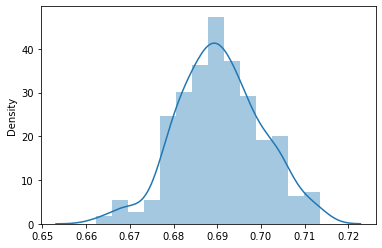

######### 7 번째 데이터 학습 결과 #########


SEED는 :     0   F1스코어는 : 0.69490   최대 스코어는 : 0.69490   지금까지 평균스코어는 : 0.69490
SEED는 :     5   F1스코어는 : 0.68366   최대 스코어는 : 0.69490   지금까지 평균스코어는 : 0.68928
SEED는 :    20   F1스코어는 : 0.70119   최대 스코어는 : 0.70119   지금까지 평균스코어는 : 0.69325
SEED는 :    45   F1스코어는 : 0.71117   최대 스코어는 : 0.71117   지금까지 평균스코어는 : 0.69773
SEED는 :    80   F1스코어는 : 0.70458   최대 스코어는 : 0.71117   지금까지 평균스코어는 : 0.69910
SEED는 :   125   F1스코어는 : 0.69003   최대 스코어는 : 0.71117   지금까지 평균스코어는 : 0.69759
SEED는 :   180   F1스코어는 : 0.68763   최대 스코어는 : 0.71117   지금까지 평균스코어는 : 0.69617
SEED는 :   245   F1스코어는 : 0.68801   최대 스코어는 : 0.71117   지금까지 평균스코어는 : 0.69515
SEED는 :   320   F1스코어는 : 0.69934   최대 스코어는 : 0.71117   지금까지 평균스코어는 : 0.69561
SEED는 :   405   F1스코어는 : 0.69896   최대 스코어는 : 0.71117   지금까지 평균스코어는 : 0.69595
SEED는 :   500   F1스코어는 : 0.70468   최대 스코어는 : 0.71117   지금까지 평균스코어는 : 0.69674
SEED는 :   605   F1스코어는 : 0.69075   최대 스코어는 : 0.71117   지금까지 평균스코어는 : 0.69624
SEED는 :   720   F1스코어는 : 0.68591   최대 스코어는 : 0.71117   지금까지 평균스코어는 : 0.69545

SEED는 : 57245   F1스코어는 : 0.68795   최대 스코어는 : 0.72363   지금까지 평균스코어는 : 0.69050
SEED는 : 58320   F1스코어는 : 0.70420   최대 스코어는 : 0.72363   지금까지 평균스코어는 : 0.69063
SEED는 : 59405   F1스코어는 : 0.67619   최대 스코어는 : 0.72363   지금까지 평균스코어는 : 0.69050
SEED는 : 60500   F1스코어는 : 0.67708   최대 스코어는 : 0.72363   지금까지 평균스코어는 : 0.69038
SEED는 : 61605   F1스코어는 : 0.70891   최대 스코어는 : 0.72363   지금까지 평균스코어는 : 0.69054
SEED는 : 62720   F1스코어는 : 0.70185   최대 스코어는 : 0.72363   지금까지 평균스코어는 : 0.69064
SEED는 : 63845   F1스코어는 : 0.70026   최대 스코어는 : 0.72363   지금까지 평균스코어는 : 0.69073
SEED는 : 64980   F1스코어는 : 0.71043   최대 스코어는 : 0.72363   지금까지 평균스코어는 : 0.69090
SEED는 : 66125   F1스코어는 : 0.70043   최대 스코어는 : 0.72363   지금까지 평균스코어는 : 0.69098
SEED는 : 67280   F1스코어는 : 0.68930   최대 스코어는 : 0.72363   지금까지 평균스코어는 : 0.69096
SEED는 : 68445   F1스코어는 : 0.68291   최대 스코어는 : 0.72363   지금까지 평균스코어는 : 0.69090
SEED는 : 69620   F1스코어는 : 0.68552   최대 스코어는 : 0.72363   지금까지 평균스코어는 : 0.69085
SEED는 : 70805   F1스코어는 : 0.70381   최대 스코어는 : 0.72363   지금까지 평균스코어는 : 0.69096

SEED는 : 226845   F1스코어는 : 0.69722   최대 스코어는 : 0.72363   지금까지 평균스코어는 : 0.69040
SEED는 : 228980   F1스코어는 : 0.69719   최대 스코어는 : 0.72363   지금까지 평균스코어는 : 0.69043
SEED는 : 231125   F1스코어는 : 0.69057   최대 스코어는 : 0.72363   지금까지 평균스코어는 : 0.69043
SEED는 : 233280   F1스코어는 : 0.66752   최대 스코어는 : 0.72363   지금까지 평균스코어는 : 0.69033
SEED는 : 235445   F1스코어는 : 0.67898   최대 스코어는 : 0.72363   지금까지 평균스코어는 : 0.69028
SEED는 : 237620   F1스코어는 : 0.69177   최대 스코어는 : 0.72363   지금까지 평균스코어는 : 0.69028
SEED는 : 239805   F1스코어는 : 0.69185   최대 스코어는 : 0.72363   지금까지 평균스코어는 : 0.69029
SEED는 : 242000   F1스코어는 : 0.68310   최대 스코어는 : 0.72363   지금까지 평균스코어는 : 0.69026
SEED는 : 244205   F1스코어는 : 0.69299   최대 스코어는 : 0.72363   지금까지 평균스코어는 : 0.69027
SEED는 : 246420   F1스코어는 : 0.69192   최대 스코어는 : 0.72363   지금까지 평균스코어는 : 0.69028
SEED는 : 248645   F1스코어는 : 0.69702   최대 스코어는 : 0.72363   지금까지 평균스코어는 : 0.69031
SEED는 : 250880   F1스코어는 : 0.71698   최대 스코어는 : 0.72363   지금까지 평균스코어는 : 0.69043
SEED는 : 253125   F1스코어는 : 0.68619   최대 스코어는 : 0.72363   지금까지 평균스

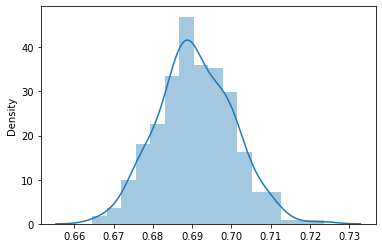

######### 8 번째 데이터 학습 결과 #########


SEED는 :     0   F1스코어는 : 0.70203   최대 스코어는 : 0.70203   지금까지 평균스코어는 : 0.70203
SEED는 :     5   F1스코어는 : 0.69427   최대 스코어는 : 0.70203   지금까지 평균스코어는 : 0.69815
SEED는 :    20   F1스코어는 : 0.69307   최대 스코어는 : 0.70203   지금까지 평균스코어는 : 0.69646
SEED는 :    45   F1스코어는 : 0.70787   최대 스코어는 : 0.70787   지금까지 평균스코어는 : 0.69931
SEED는 :    80   F1스코어는 : 0.70503   최대 스코어는 : 0.70787   지금까지 평균스코어는 : 0.70045
SEED는 :   125   F1스코어는 : 0.70046   최대 스코어는 : 0.70787   지금까지 평균스코어는 : 0.70045
SEED는 :   180   F1스코어는 : 0.69326   최대 스코어는 : 0.70787   지금까지 평균스코어는 : 0.69943
SEED는 :   245   F1스코어는 : 0.69130   최대 스코어는 : 0.70787   지금까지 평균스코어는 : 0.69841
SEED는 :   320   F1스코어는 : 0.69662   최대 스코어는 : 0.70787   지금까지 평균스코어는 : 0.69821
SEED는 :   405   F1스코어는 : 0.69659   최대 스코어는 : 0.70787   지금까지 평균스코어는 : 0.69805
SEED는 :   500   F1스코어는 : 0.70217   최대 스코어는 : 0.70787   지금까지 평균스코어는 : 0.69842
SEED는 :   605   F1스코어는 : 0.69046   최대 스코어는 : 0.70787   지금까지 평균스코어는 : 0.69776
SEED는 :   720   F1스코어는 : 0.68399   최대 스코어는 : 0.70787   지금까지 평균스코어는 : 0.69670

SEED는 : 57245   F1스코어는 : 0.69123   최대 스코어는 : 0.71571   지금까지 평균스코어는 : 0.69075
SEED는 : 58320   F1스코어는 : 0.69507   최대 스코어는 : 0.71571   지금까지 평균스코어는 : 0.69079
SEED는 : 59405   F1스코어는 : 0.66875   최대 스코어는 : 0.71571   지금까지 평균스코어는 : 0.69059
SEED는 : 60500   F1스코어는 : 0.68307   최대 스코어는 : 0.71571   지금까지 평균스코어는 : 0.69052
SEED는 : 61605   F1스코어는 : 0.70749   최대 스코어는 : 0.71571   지금까지 평균스코어는 : 0.69067
SEED는 : 62720   F1스코어는 : 0.70979   최대 스코어는 : 0.71571   지금까지 평균스코어는 : 0.69084
SEED는 : 63845   F1스코어는 : 0.70154   최대 스코어는 : 0.71571   지금까지 평균스코어는 : 0.69093
SEED는 : 64980   F1스코어는 : 0.71482   최대 스코어는 : 0.71571   지금까지 평균스코어는 : 0.69114
SEED는 : 66125   F1스코어는 : 0.70402   최대 스코어는 : 0.71571   지금까지 평균스코어는 : 0.69125
SEED는 : 67280   F1스코어는 : 0.69247   최대 스코어는 : 0.71571   지금까지 평균스코어는 : 0.69126
SEED는 : 68445   F1스코어는 : 0.67959   최대 스코어는 : 0.71571   지금까지 평균스코어는 : 0.69116
SEED는 : 69620   F1스코어는 : 0.67890   최대 스코어는 : 0.71571   지금까지 평균스코어는 : 0.69106
SEED는 : 70805   F1스코어는 : 0.70497   최대 스코어는 : 0.71571   지금까지 평균스코어는 : 0.69118

SEED는 : 226845   F1스코어는 : 0.69054   최대 스코어는 : 0.71571   지금까지 평균스코어는 : 0.69058
SEED는 : 228980   F1스코어는 : 0.70337   최대 스코어는 : 0.71571   지금까지 평균스코어는 : 0.69064
SEED는 : 231125   F1스코어는 : 0.69426   최대 스코어는 : 0.71571   지금까지 평균스코어는 : 0.69066
SEED는 : 233280   F1스코어는 : 0.66780   최대 스코어는 : 0.71571   지금까지 평균스코어는 : 0.69055
SEED는 : 235445   F1스코어는 : 0.67563   최대 스코어는 : 0.71571   지금까지 평균스코어는 : 0.69048
SEED는 : 237620   F1스코어는 : 0.68301   최대 스코어는 : 0.71571   지금까지 평균스코어는 : 0.69045
SEED는 : 239805   F1스코어는 : 0.68750   최대 스코어는 : 0.71571   지금까지 평균스코어는 : 0.69044
SEED는 : 242000   F1스코어는 : 0.67885   최대 스코어는 : 0.71571   지금까지 평균스코어는 : 0.69038
SEED는 : 244205   F1스코어는 : 0.68750   최대 스코어는 : 0.71571   지금까지 평균스코어는 : 0.69037
SEED는 : 246420   F1스코어는 : 0.69011   최대 스코어는 : 0.71571   지금까지 평균스코어는 : 0.69037
SEED는 : 248645   F1스코어는 : 0.69957   최대 스코어는 : 0.71571   지금까지 평균스코어는 : 0.69041
SEED는 : 250880   F1스코어는 : 0.70252   최대 스코어는 : 0.71571   지금까지 평균스코어는 : 0.69046
SEED는 : 253125   F1스코어는 : 0.69047   최대 스코어는 : 0.71571   지금까지 평균스

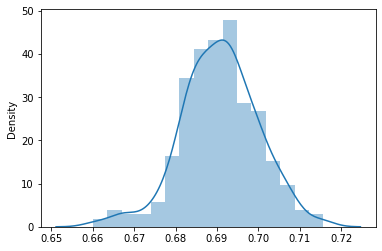

######### 9 번째 데이터 학습 결과 #########


SEED는 :     0   F1스코어는 : 0.70860   최대 스코어는 : 0.70860   지금까지 평균스코어는 : 0.70860
SEED는 :     5   F1스코어는 : 0.69077   최대 스코어는 : 0.70860   지금까지 평균스코어는 : 0.69969
SEED는 :    20   F1스코어는 : 0.68914   최대 스코어는 : 0.70860   지금까지 평균스코어는 : 0.69617
SEED는 :    45   F1스코어는 : 0.70384   최대 스코어는 : 0.70860   지금까지 평균스코어는 : 0.69809
SEED는 :    80   F1스코어는 : 0.70981   최대 스코어는 : 0.70981   지금까지 평균스코어는 : 0.70044
SEED는 :   125   F1스코어는 : 0.69711   최대 스코어는 : 0.70981   지금까지 평균스코어는 : 0.69988
SEED는 :   180   F1스코어는 : 0.68448   최대 스코어는 : 0.70981   지금까지 평균스코어는 : 0.69768
SEED는 :   245   F1스코어는 : 0.68745   최대 스코어는 : 0.70981   지금까지 평균스코어는 : 0.69640
SEED는 :   320   F1스코어는 : 0.69777   최대 스코어는 : 0.70981   지금까지 평균스코어는 : 0.69655
SEED는 :   405   F1스코어는 : 0.68876   최대 스코어는 : 0.70981   지금까지 평균스코어는 : 0.69577
SEED는 :   500   F1스코어는 : 0.70454   최대 스코어는 : 0.70981   지금까지 평균스코어는 : 0.69657
SEED는 :   605   F1스코어는 : 0.69241   최대 스코어는 : 0.70981   지금까지 평균스코어는 : 0.69622
SEED는 :   720   F1스코어는 : 0.67936   최대 스코어는 : 0.70981   지금까지 평균스코어는 : 0.69493

SEED는 : 57245   F1스코어는 : 0.68954   최대 스코어는 : 0.71713   지금까지 평균스코어는 : 0.69138
SEED는 : 58320   F1스코어는 : 0.70282   최대 스코어는 : 0.71713   지금까지 평균스코어는 : 0.69148
SEED는 : 59405   F1스코어는 : 0.66786   최대 스코어는 : 0.71713   지금까지 평균스코어는 : 0.69127
SEED는 : 60500   F1스코어는 : 0.68779   최대 스코어는 : 0.71713   지금까지 평균스코어는 : 0.69123
SEED는 : 61605   F1스코어는 : 0.70221   최대 스코어는 : 0.71713   지금까지 평균스코어는 : 0.69133
SEED는 : 62720   F1스코어는 : 0.69604   최대 스코어는 : 0.71713   지금까지 평균스코어는 : 0.69137
SEED는 : 63845   F1스코어는 : 0.70904   최대 스코어는 : 0.71713   지금까지 평균스코어는 : 0.69153
SEED는 : 64980   F1스코어는 : 0.70877   최대 스코어는 : 0.71713   지금까지 평균스코어는 : 0.69168
SEED는 : 66125   F1스코어는 : 0.69851   최대 스코어는 : 0.71713   지금까지 평균스코어는 : 0.69174
SEED는 : 67280   F1스코어는 : 0.68968   최대 스코어는 : 0.71713   지금까지 평균스코어는 : 0.69172
SEED는 : 68445   F1스코어는 : 0.68691   최대 스코어는 : 0.71713   지금까지 평균스코어는 : 0.69168
SEED는 : 69620   F1스코어는 : 0.68229   최대 스코어는 : 0.71713   지금까지 평균스코어는 : 0.69160
SEED는 : 70805   F1스코어는 : 0.69894   최대 스코어는 : 0.71713   지금까지 평균스코어는 : 0.69166

SEED는 : 226845   F1스코어는 : 0.68726   최대 스코어는 : 0.71713   지금까지 평균스코어는 : 0.69042
SEED는 : 228980   F1스코어는 : 0.69482   최대 스코어는 : 0.71713   지금까지 평균스코어는 : 0.69044
SEED는 : 231125   F1스코어는 : 0.68907   최대 스코어는 : 0.71713   지금까지 평균스코어는 : 0.69044
SEED는 : 233280   F1스코어는 : 0.68226   최대 스코어는 : 0.71713   지금까지 평균스코어는 : 0.69040
SEED는 : 235445   F1스코어는 : 0.67978   최대 스코어는 : 0.71713   지금까지 평균스코어는 : 0.69035
SEED는 : 237620   F1스코어는 : 0.67955   최대 스코어는 : 0.71713   지금까지 평균스코어는 : 0.69030
SEED는 : 239805   F1스코어는 : 0.68739   최대 스코어는 : 0.71713   지금까지 평균스코어는 : 0.69029
SEED는 : 242000   F1스코어는 : 0.68048   최대 스코어는 : 0.71713   지금까지 평균스코어는 : 0.69024
SEED는 : 244205   F1스코어는 : 0.69159   최대 스코어는 : 0.71713   지금까지 평균스코어는 : 0.69025
SEED는 : 246420   F1스코어는 : 0.69020   최대 스코어는 : 0.71713   지금까지 평균스코어는 : 0.69025
SEED는 : 248645   F1스코어는 : 0.68737   최대 스코어는 : 0.71713   지금까지 평균스코어는 : 0.69024
SEED는 : 250880   F1스코어는 : 0.70742   최대 스코어는 : 0.71713   지금까지 평균스코어는 : 0.69031
SEED는 : 253125   F1스코어는 : 0.68885   최대 스코어는 : 0.71713   지금까지 평균스

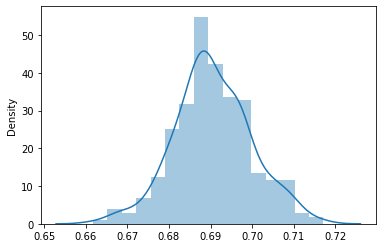

######### 10 번째 데이터 학습 결과 #########


SEED는 :     0   F1스코어는 : 0.70508   최대 스코어는 : 0.70508   지금까지 평균스코어는 : 0.70508
SEED는 :     5   F1스코어는 : 0.69157   최대 스코어는 : 0.70508   지금까지 평균스코어는 : 0.69833
SEED는 :    20   F1스코어는 : 0.68858   최대 스코어는 : 0.70508   지금까지 평균스코어는 : 0.69508
SEED는 :    45   F1스코어는 : 0.70339   최대 스코어는 : 0.70508   지금까지 평균스코어는 : 0.69716
SEED는 :    80   F1스코어는 : 0.71169   최대 스코어는 : 0.71169   지금까지 평균스코어는 : 0.70006
SEED는 :   125   F1스코어는 : 0.70257   최대 스코어는 : 0.71169   지금까지 평균스코어는 : 0.70048
SEED는 :   180   F1스코어는 : 0.68503   최대 스코어는 : 0.71169   지금까지 평균스코어는 : 0.69827
SEED는 :   245   F1스코어는 : 0.68554   최대 스코어는 : 0.71169   지금까지 평균스코어는 : 0.69668
SEED는 :   320   F1스코어는 : 0.70123   최대 스코어는 : 0.71169   지금까지 평균스코어는 : 0.69719
SEED는 :   405   F1스코어는 : 0.69112   최대 스코어는 : 0.71169   지금까지 평균스코어는 : 0.69658
SEED는 :   500   F1스코어는 : 0.70102   최대 스코어는 : 0.71169   지금까지 평균스코어는 : 0.69698
SEED는 :   605   F1스코어는 : 0.69495   최대 스코어는 : 0.71169   지금까지 평균스코어는 : 0.69681
SEED는 :   720   F1스코어는 : 0.68669   최대 스코어는 : 0.71169   지금까지 평균스코어는 : 0.69604

SEED는 : 57245   F1스코어는 : 0.68763   최대 스코어는 : 0.71828   지금까지 평균스코어는 : 0.69073
SEED는 : 58320   F1스코어는 : 0.70143   최대 스코어는 : 0.71828   지금까지 평균스코어는 : 0.69082
SEED는 : 59405   F1스코어는 : 0.68306   최대 스코어는 : 0.71828   지금까지 평균스코어는 : 0.69075
SEED는 : 60500   F1스코어는 : 0.68753   최대 스코어는 : 0.71828   지금까지 평균스코어는 : 0.69072
SEED는 : 61605   F1스코어는 : 0.69554   최대 스코어는 : 0.71828   지금까지 평균스코어는 : 0.69077
SEED는 : 62720   F1스코어는 : 0.70018   최대 스코어는 : 0.71828   지금까지 평균스코어는 : 0.69085
SEED는 : 63845   F1스코어는 : 0.70493   최대 스코어는 : 0.71828   지금까지 평균스코어는 : 0.69097
SEED는 : 64980   F1스코어는 : 0.70736   최대 스코어는 : 0.71828   지금까지 평균스코어는 : 0.69112
SEED는 : 66125   F1스코어는 : 0.69119   최대 스코어는 : 0.71828   지금까지 평균스코어는 : 0.69112
SEED는 : 67280   F1스코어는 : 0.69928   최대 스코어는 : 0.71828   지금까지 평균스코어는 : 0.69119
SEED는 : 68445   F1스코어는 : 0.69402   최대 스코어는 : 0.71828   지금까지 평균스코어는 : 0.69121
SEED는 : 69620   F1스코어는 : 0.67340   최대 스코어는 : 0.71828   지금까지 평균스코어는 : 0.69106
SEED는 : 70805   F1스코어는 : 0.70240   최대 스코어는 : 0.71828   지금까지 평균스코어는 : 0.69116

SEED는 : 226845   F1스코어는 : 0.69525   최대 스코어는 : 0.71828   지금까지 평균스코어는 : 0.69034
SEED는 : 228980   F1스코어는 : 0.68545   최대 스코어는 : 0.71828   지금까지 평균스코어는 : 0.69032
SEED는 : 231125   F1스코어는 : 0.69584   최대 스코어는 : 0.71828   지금까지 평균스코어는 : 0.69034
SEED는 : 233280   F1스코어는 : 0.67896   최대 스코어는 : 0.71828   지금까지 평균스코어는 : 0.69029
SEED는 : 235445   F1스코어는 : 0.68098   최대 스코어는 : 0.71828   지금까지 평균스코어는 : 0.69025
SEED는 : 237620   F1스코어는 : 0.67926   최대 스코어는 : 0.71828   지금까지 평균스코어는 : 0.69020
SEED는 : 239805   F1스코어는 : 0.68742   최대 스코어는 : 0.71828   지금까지 평균스코어는 : 0.69019
SEED는 : 242000   F1스코어는 : 0.68446   최대 스코어는 : 0.71828   지금까지 평균스코어는 : 0.69016
SEED는 : 244205   F1스코어는 : 0.69469   최대 스코어는 : 0.71828   지금까지 평균스코어는 : 0.69018
SEED는 : 246420   F1스코어는 : 0.69641   최대 스코어는 : 0.71828   지금까지 평균스코어는 : 0.69021
SEED는 : 248645   F1스코어는 : 0.69510   최대 스코어는 : 0.71828   지금까지 평균스코어는 : 0.69023
SEED는 : 250880   F1스코어는 : 0.70805   최대 스코어는 : 0.71828   지금까지 평균스코어는 : 0.69031
SEED는 : 253125   F1스코어는 : 0.68766   최대 스코어는 : 0.71828   지금까지 평균스

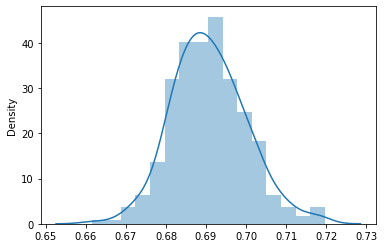

######### 11 번째 데이터 학습 결과 #########


SEED는 :     0   F1스코어는 : 0.69744   최대 스코어는 : 0.69744   지금까지 평균스코어는 : 0.69744
SEED는 :     5   F1스코어는 : 0.70749   최대 스코어는 : 0.70749   지금까지 평균스코어는 : 0.70246
SEED는 :    20   F1스코어는 : 0.68421   최대 스코어는 : 0.70749   지금까지 평균스코어는 : 0.69638
SEED는 :    45   F1스코어는 : 0.69591   최대 스코어는 : 0.70749   지금까지 평균스코어는 : 0.69626
SEED는 :    80   F1스코어는 : 0.71202   최대 스코어는 : 0.71202   지금까지 평균스코어는 : 0.69941
SEED는 :   125   F1스코어는 : 0.68081   최대 스코어는 : 0.71202   지금까지 평균스코어는 : 0.69631
SEED는 :   180   F1스코어는 : 0.69114   최대 스코어는 : 0.71202   지금까지 평균스코어는 : 0.69558
SEED는 :   245   F1스코어는 : 0.70228   최대 스코어는 : 0.71202   지금까지 평균스코어는 : 0.69641
SEED는 :   320   F1스코어는 : 0.68467   최대 스코어는 : 0.71202   지금까지 평균스코어는 : 0.69511
SEED는 :   405   F1스코어는 : 0.69431   최대 스코어는 : 0.71202   지금까지 평균스코어는 : 0.69503
SEED는 :   500   F1스코어는 : 0.69250   최대 스코어는 : 0.71202   지금까지 평균스코어는 : 0.69480
SEED는 :   605   F1스코어는 : 0.69250   최대 스코어는 : 0.71202   지금까지 평균스코어는 : 0.69461
SEED는 :   720   F1스코어는 : 0.68974   최대 스코어는 : 0.71202   지금까지 평균스코어는 : 0.69423

SEED는 : 57245   F1스코어는 : 0.69471   최대 스코어는 : 0.71394   지금까지 평균스코어는 : 0.69111
SEED는 : 58320   F1스코어는 : 0.67915   최대 스코어는 : 0.71394   지금까지 평균스코어는 : 0.69100
SEED는 : 59405   F1스코어는 : 0.68460   최대 스코어는 : 0.71394   지금까지 평균스코어는 : 0.69095
SEED는 : 60500   F1스코어는 : 0.68160   최대 스코어는 : 0.71394   지금까지 평균스코어는 : 0.69086
SEED는 : 61605   F1스코어는 : 0.67798   최대 스코어는 : 0.71394   지금까지 평균스코어는 : 0.69075
SEED는 : 62720   F1스코어는 : 0.69329   최대 스코어는 : 0.71394   지금까지 평균스코어는 : 0.69077
SEED는 : 63845   F1스코어는 : 0.69142   최대 스코어는 : 0.71394   지금까지 평균스코어는 : 0.69078
SEED는 : 64980   F1스코어는 : 0.68753   최대 스코어는 : 0.71394   지금까지 평균스코어는 : 0.69075
SEED는 : 66125   F1스코어는 : 0.68455   최대 스코어는 : 0.71394   지금까지 평균스코어는 : 0.69069
SEED는 : 67280   F1스코어는 : 0.68915   최대 스코어는 : 0.71394   지금까지 평균스코어는 : 0.69068
SEED는 : 68445   F1스코어는 : 0.70300   최대 스코어는 : 0.71394   지금까지 평균스코어는 : 0.69078
SEED는 : 69620   F1스코어는 : 0.68502   최대 스코어는 : 0.71394   지금까지 평균스코어는 : 0.69074
SEED는 : 70805   F1스코어는 : 0.69353   최대 스코어는 : 0.71394   지금까지 평균스코어는 : 0.69076

SEED는 : 226845   F1스코어는 : 0.71131   최대 스코어는 : 0.71423   지금까지 평균스코어는 : 0.69057
SEED는 : 228980   F1스코어는 : 0.70549   최대 스코어는 : 0.71423   지금까지 평균스코어는 : 0.69064
SEED는 : 231125   F1스코어는 : 0.71349   최대 스코어는 : 0.71423   지금까지 평균스코어는 : 0.69074
SEED는 : 233280   F1스코어는 : 0.69429   최대 스코어는 : 0.71423   지금까지 평균스코어는 : 0.69076
SEED는 : 235445   F1스코어는 : 0.68683   최대 스코어는 : 0.71423   지금까지 평균스코어는 : 0.69074
SEED는 : 237620   F1스코어는 : 0.68090   최대 스코어는 : 0.71423   지금까지 평균스코어는 : 0.69070
SEED는 : 239805   F1스코어는 : 0.67222   최대 스코어는 : 0.71423   지금까지 평균스코어는 : 0.69061
SEED는 : 242000   F1스코어는 : 0.69536   최대 스코어는 : 0.71423   지금까지 평균스코어는 : 0.69063
SEED는 : 244205   F1스코어는 : 0.69992   최대 스코어는 : 0.71423   지금까지 평균스코어는 : 0.69067
SEED는 : 246420   F1스코어는 : 0.68163   최대 스코어는 : 0.71423   지금까지 평균스코어는 : 0.69063
SEED는 : 248645   F1스코어는 : 0.68262   최대 스코어는 : 0.71423   지금까지 평균스코어는 : 0.69060
SEED는 : 250880   F1스코어는 : 0.69561   최대 스코어는 : 0.71423   지금까지 평균스코어는 : 0.69062
SEED는 : 253125   F1스코어는 : 0.69221   최대 스코어는 : 0.71423   지금까지 평균스

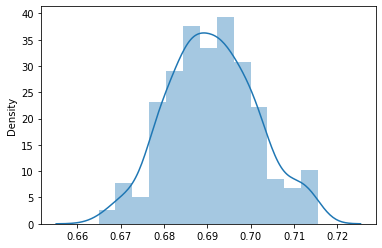

######### 12 번째 데이터 학습 결과 #########


SEED는 :     0   F1스코어는 : 0.70000   최대 스코어는 : 0.70000   지금까지 평균스코어는 : 0.70000
SEED는 :     5   F1스코어는 : 0.70441   최대 스코어는 : 0.70441   지금까지 평균스코어는 : 0.70221
SEED는 :    20   F1스코어는 : 0.68816   최대 스코어는 : 0.70441   지금까지 평균스코어는 : 0.69753
SEED는 :    45   F1스코어는 : 0.69618   최대 스코어는 : 0.70441   지금까지 평균스코어는 : 0.69719
SEED는 :    80   F1스코어는 : 0.71026   최대 스코어는 : 0.71026   지금까지 평균스코어는 : 0.69980
SEED는 :   125   F1스코어는 : 0.67357   최대 스코어는 : 0.71026   지금까지 평균스코어는 : 0.69543
SEED는 :   180   F1스코어는 : 0.68052   최대 스코어는 : 0.71026   지금까지 평균스코어는 : 0.69330
SEED는 :   245   F1스코어는 : 0.69811   최대 스코어는 : 0.71026   지금까지 평균스코어는 : 0.69390
SEED는 :   320   F1스코어는 : 0.68998   최대 스코어는 : 0.71026   지금까지 평균스코어는 : 0.69347
SEED는 :   405   F1스코어는 : 0.69771   최대 스코어는 : 0.71026   지금까지 평균스코어는 : 0.69389
SEED는 :   500   F1스코어는 : 0.69351   최대 스코어는 : 0.71026   지금까지 평균스코어는 : 0.69386
SEED는 :   605   F1스코어는 : 0.69243   최대 스코어는 : 0.71026   지금까지 평균스코어는 : 0.69374
SEED는 :   720   F1스코어는 : 0.69106   최대 스코어는 : 0.71026   지금까지 평균스코어는 : 0.69353

SEED는 : 57245   F1스코어는 : 0.68974   최대 스코어는 : 0.71224   지금까지 평균스코어는 : 0.69032
SEED는 : 58320   F1스코어는 : 0.68715   최대 스코어는 : 0.71224   지금까지 평균스코어는 : 0.69029
SEED는 : 59405   F1스코어는 : 0.68584   최대 스코어는 : 0.71224   지금까지 평균스코어는 : 0.69025
SEED는 : 60500   F1스코어는 : 0.68398   최대 스코어는 : 0.71224   지금까지 평균스코어는 : 0.69019
SEED는 : 61605   F1스코어는 : 0.67362   최대 스코어는 : 0.71224   지금까지 평균스코어는 : 0.69005
SEED는 : 62720   F1스코어는 : 0.69264   최대 스코어는 : 0.71224   지금까지 평균스코어는 : 0.69007
SEED는 : 63845   F1스코어는 : 0.68983   최대 스코어는 : 0.71224   지금까지 평균스코어는 : 0.69007
SEED는 : 64980   F1스코어는 : 0.68939   최대 스코어는 : 0.71224   지금까지 평균스코어는 : 0.69006
SEED는 : 66125   F1스코어는 : 0.69039   최대 스코어는 : 0.71224   지금까지 평균스코어는 : 0.69006
SEED는 : 67280   F1스코어는 : 0.68362   최대 스코어는 : 0.71224   지금까지 평균스코어는 : 0.69001
SEED는 : 68445   F1스코어는 : 0.69941   최대 스코어는 : 0.71224   지금까지 평균스코어는 : 0.69009
SEED는 : 69620   F1스코어는 : 0.69674   최대 스코어는 : 0.71224   지금까지 평균스코어는 : 0.69014
SEED는 : 70805   F1스코어는 : 0.70247   최대 스코어는 : 0.71224   지금까지 평균스코어는 : 0.69025

SEED는 : 226845   F1스코어는 : 0.70554   최대 스코어는 : 0.71333   지금까지 평균스코어는 : 0.69001
SEED는 : 228980   F1스코어는 : 0.71267   최대 스코어는 : 0.71333   지금까지 평균스코어는 : 0.69012
SEED는 : 231125   F1스코어는 : 0.71144   최대 스코어는 : 0.71333   지금까지 평균스코어는 : 0.69022
SEED는 : 233280   F1스코어는 : 0.69351   최대 스코어는 : 0.71333   지금까지 평균스코어는 : 0.69023
SEED는 : 235445   F1스코어는 : 0.68882   최대 스코어는 : 0.71333   지금까지 평균스코어는 : 0.69022
SEED는 : 237620   F1스코어는 : 0.68483   최대 스코어는 : 0.71333   지금까지 평균스코어는 : 0.69020
SEED는 : 239805   F1스코어는 : 0.66491   최대 스코어는 : 0.71333   지금까지 평균스코어는 : 0.69009
SEED는 : 242000   F1스코어는 : 0.69736   최대 스코어는 : 0.71333   지금까지 평균스코어는 : 0.69012
SEED는 : 244205   F1스코어는 : 0.70350   최대 스코어는 : 0.71333   지금까지 평균스코어는 : 0.69018
SEED는 : 246420   F1스코어는 : 0.68613   최대 스코어는 : 0.71333   지금까지 평균스코어는 : 0.69016
SEED는 : 248645   F1스코어는 : 0.67929   최대 스코어는 : 0.71333   지금까지 평균스코어는 : 0.69011
SEED는 : 250880   F1스코어는 : 0.69736   최대 스코어는 : 0.71333   지금까지 평균스코어는 : 0.69014
SEED는 : 253125   F1스코어는 : 0.69393   최대 스코어는 : 0.71333   지금까지 평균스

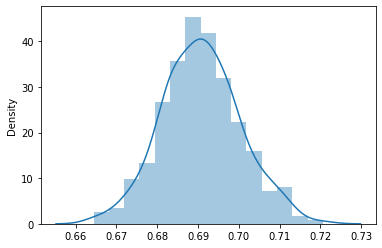

######### 13 번째 데이터 학습 결과 #########


SEED는 :     0   F1스코어는 : 0.69295   최대 스코어는 : 0.69295   지금까지 평균스코어는 : 0.69295
SEED는 :     5   F1스코어는 : 0.71487   최대 스코어는 : 0.71487   지금까지 평균스코어는 : 0.70391
SEED는 :    20   F1스코어는 : 0.69451   최대 스코어는 : 0.71487   지금까지 평균스코어는 : 0.70078
SEED는 :    45   F1스코어는 : 0.70222   최대 스코어는 : 0.71487   지금까지 평균스코어는 : 0.70114
SEED는 :    80   F1스코어는 : 0.71700   최대 스코어는 : 0.71700   지금까지 평균스코어는 : 0.70431
SEED는 :   125   F1스코어는 : 0.67419   최대 스코어는 : 0.71700   지금까지 평균스코어는 : 0.69929
SEED는 :   180   F1스코어는 : 0.67960   최대 스코어는 : 0.71700   지금까지 평균스코어는 : 0.69648
SEED는 :   245   F1스코어는 : 0.69715   최대 스코어는 : 0.71700   지금까지 평균스코어는 : 0.69656
SEED는 :   320   F1스코어는 : 0.69565   최대 스코어는 : 0.71700   지금까지 평균스코어는 : 0.69646
SEED는 :   405   F1스코어는 : 0.69120   최대 스코어는 : 0.71700   지금까지 평균스코어는 : 0.69594
SEED는 :   500   F1스코어는 : 0.69263   최대 스코어는 : 0.71700   지금까지 평균스코어는 : 0.69564
SEED는 :   605   F1스코어는 : 0.69457   최대 스코어는 : 0.71700   지금까지 평균스코어는 : 0.69555
SEED는 :   720   F1스코어는 : 0.69254   최대 스코어는 : 0.71700   지금까지 평균스코어는 : 0.69531

SEED는 : 57245   F1스코어는 : 0.69342   최대 스코어는 : 0.71700   지금까지 평균스코어는 : 0.69008
SEED는 : 58320   F1스코어는 : 0.68357   최대 스코어는 : 0.71700   지금까지 평균스코어는 : 0.69002
SEED는 : 59405   F1스코어는 : 0.68392   최대 스코어는 : 0.71700   지금까지 평균스코어는 : 0.68997
SEED는 : 60500   F1스코어는 : 0.68091   최대 스코어는 : 0.71700   지금까지 평균스코어는 : 0.68989
SEED는 : 61605   F1스코어는 : 0.68293   최대 스코어는 : 0.71700   지금까지 평균스코어는 : 0.68982
SEED는 : 62720   F1스코어는 : 0.69512   최대 스코어는 : 0.71700   지금까지 평균스코어는 : 0.68987
SEED는 : 63845   F1스코어는 : 0.69039   최대 스코어는 : 0.71700   지금까지 평균스코어는 : 0.68988
SEED는 : 64980   F1스코어는 : 0.68862   최대 스코어는 : 0.71700   지금까지 평균스코어는 : 0.68986
SEED는 : 66125   F1스코어는 : 0.69152   최대 스코어는 : 0.71700   지금까지 평균스코어는 : 0.68988
SEED는 : 67280   F1스코어는 : 0.68632   최대 스코어는 : 0.71700   지금까지 평균스코어는 : 0.68985
SEED는 : 68445   F1스코어는 : 0.69758   최대 스코어는 : 0.71700   지금까지 평균스코어는 : 0.68991
SEED는 : 69620   F1스코어는 : 0.68729   최대 스코어는 : 0.71700   지금까지 평균스코어는 : 0.68989
SEED는 : 70805   F1스코어는 : 0.69565   최대 스코어는 : 0.71700   지금까지 평균스코어는 : 0.68994

SEED는 : 226845   F1스코어는 : 0.70754   최대 스코어는 : 0.71700   지금까지 평균스코어는 : 0.69005
SEED는 : 228980   F1스코어는 : 0.71202   최대 스코어는 : 0.71700   지금까지 평균스코어는 : 0.69015
SEED는 : 231125   F1스코어는 : 0.69974   최대 스코어는 : 0.71700   지금까지 평균스코어는 : 0.69019
SEED는 : 233280   F1스코어는 : 0.70139   최대 스코어는 : 0.71700   지금까지 평균스코어는 : 0.69025
SEED는 : 235445   F1스코어는 : 0.69353   최대 스코어는 : 0.71700   지금까지 평균스코어는 : 0.69026
SEED는 : 237620   F1스코어는 : 0.68887   최대 스코어는 : 0.71700   지금까지 평균스코어는 : 0.69025
SEED는 : 239805   F1스코어는 : 0.67250   최대 스코어는 : 0.71700   지금까지 평균스코어는 : 0.69017
SEED는 : 242000   F1스코어는 : 0.69744   최대 스코어는 : 0.71700   지금까지 평균스코어는 : 0.69021
SEED는 : 244205   F1스코어는 : 0.69899   최대 스코어는 : 0.71700   지금까지 평균스코어는 : 0.69025
SEED는 : 246420   F1스코어는 : 0.68613   최대 스코어는 : 0.71700   지금까지 평균스코어는 : 0.69023
SEED는 : 248645   F1스코어는 : 0.68043   최대 스코어는 : 0.71700   지금까지 평균스코어는 : 0.69018
SEED는 : 250880   F1스코어는 : 0.69204   최대 스코어는 : 0.71700   지금까지 평균스코어는 : 0.69019
SEED는 : 253125   F1스코어는 : 0.69364   최대 스코어는 : 0.71700   지금까지 평균스

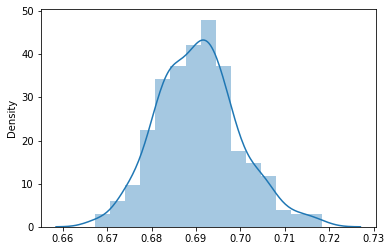

######### 14 번째 데이터 학습 결과 #########


SEED는 :     0   F1스코어는 : 0.69609   최대 스코어는 : 0.69609   지금까지 평균스코어는 : 0.69609
SEED는 :     5   F1스코어는 : 0.70221   최대 스코어는 : 0.70221   지금까지 평균스코어는 : 0.69915
SEED는 :    20   F1스코어는 : 0.68620   최대 스코어는 : 0.70221   지금까지 평균스코어는 : 0.69483
SEED는 :    45   F1스코어는 : 0.70427   최대 스코어는 : 0.70427   지금까지 평균스코어는 : 0.69719
SEED는 :    80   F1스코어는 : 0.71453   최대 스코어는 : 0.71453   지금까지 평균스코어는 : 0.70066
SEED는 :   125   F1스코어는 : 0.67610   최대 스코어는 : 0.71453   지금까지 평균스코어는 : 0.69657
SEED는 :   180   F1스코어는 : 0.68490   최대 스코어는 : 0.71453   지금까지 평균스코어는 : 0.69490
SEED는 :   245   F1스코어는 : 0.69841   최대 스코어는 : 0.71453   지금까지 평균스코어는 : 0.69534
SEED는 :   320   F1스코어는 : 0.69914   최대 스코어는 : 0.71453   지금까지 평균스코어는 : 0.69576
SEED는 :   405   F1스코어는 : 0.69503   최대 스코어는 : 0.71453   지금까지 평균스코어는 : 0.69569
SEED는 :   500   F1스코어는 : 0.69266   최대 스코어는 : 0.71453   지금까지 평균스코어는 : 0.69541
SEED는 :   605   F1스코어는 : 0.70226   최대 스코어는 : 0.71453   지금까지 평균스코어는 : 0.69598
SEED는 :   720   F1스코어는 : 0.68542   최대 스코어는 : 0.71453   지금까지 평균스코어는 : 0.69517

SEED는 : 57245   F1스코어는 : 0.68831   최대 스코어는 : 0.71750   지금까지 평균스코어는 : 0.69178
SEED는 : 58320   F1스코어는 : 0.67537   최대 스코어는 : 0.71750   지금까지 평균스코어는 : 0.69163
SEED는 : 59405   F1스코어는 : 0.68689   최대 스코어는 : 0.71750   지금까지 평균스코어는 : 0.69158
SEED는 : 60500   F1스코어는 : 0.67868   최대 스코어는 : 0.71750   지금까지 평균스코어는 : 0.69147
SEED는 : 61605   F1스코어는 : 0.67703   최대 스코어는 : 0.71750   지금까지 평균스코어는 : 0.69134
SEED는 : 62720   F1스코어는 : 0.70553   최대 스코어는 : 0.71750   지금까지 평균스코어는 : 0.69146
SEED는 : 63845   F1스코어는 : 0.68632   최대 스코어는 : 0.71750   지금까지 평균스코어는 : 0.69142
SEED는 : 64980   F1스코어는 : 0.68895   최대 스코어는 : 0.71750   지금까지 평균스코어는 : 0.69140
SEED는 : 66125   F1스코어는 : 0.68921   최대 스코어는 : 0.71750   지금까지 평균스코어는 : 0.69138
SEED는 : 67280   F1스코어는 : 0.68520   최대 스코어는 : 0.71750   지금까지 평균스코어는 : 0.69133
SEED는 : 68445   F1스코어는 : 0.70578   최대 스코어는 : 0.71750   지금까지 평균스코어는 : 0.69145
SEED는 : 69620   F1스코어는 : 0.69253   최대 스코어는 : 0.71750   지금까지 평균스코어는 : 0.69146
SEED는 : 70805   F1스코어는 : 0.69138   최대 스코어는 : 0.71750   지금까지 평균스코어는 : 0.69146

SEED는 : 226845   F1스코어는 : 0.71210   최대 스코어는 : 0.71750   지금까지 평균스코어는 : 0.69076
SEED는 : 228980   F1스코어는 : 0.70504   최대 스코어는 : 0.71750   지금까지 평균스코어는 : 0.69083
SEED는 : 231125   F1스코어는 : 0.70112   최대 스코어는 : 0.71750   지금까지 평균스코어는 : 0.69088
SEED는 : 233280   F1스코어는 : 0.69591   최대 스코어는 : 0.71750   지금까지 평균스코어는 : 0.69090
SEED는 : 235445   F1스코어는 : 0.69450   최대 스코어는 : 0.71750   지금까지 평균스코어는 : 0.69092
SEED는 : 237620   F1스코어는 : 0.68408   최대 스코어는 : 0.71750   지금까지 평균스코어는 : 0.69089
SEED는 : 239805   F1스코어는 : 0.66492   최대 스코어는 : 0.71750   지금까지 평균스코어는 : 0.69077
SEED는 : 242000   F1스코어는 : 0.70155   최대 스코어는 : 0.71750   지금까지 평균스코어는 : 0.69082
SEED는 : 244205   F1스코어는 : 0.70085   최대 스코어는 : 0.71750   지금까지 평균스코어는 : 0.69086
SEED는 : 246420   F1스코어는 : 0.67969   최대 스코어는 : 0.71750   지금까지 평균스코어는 : 0.69081
SEED는 : 248645   F1스코어는 : 0.68858   최대 스코어는 : 0.71750   지금까지 평균스코어는 : 0.69080
SEED는 : 250880   F1스코어는 : 0.68704   최대 스코어는 : 0.71750   지금까지 평균스코어는 : 0.69079
SEED는 : 253125   F1스코어는 : 0.69508   최대 스코어는 : 0.71750   지금까지 평균스

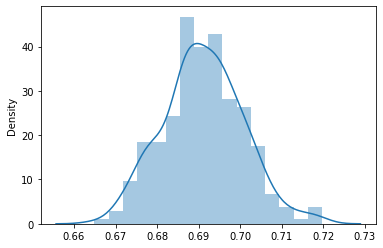

######### 15 번째 데이터 학습 결과 #########


SEED는 :     0   F1스코어는 : 0.69928   최대 스코어는 : 0.69928   지금까지 평균스코어는 : 0.69928
SEED는 :     5   F1스코어는 : 0.71754   최대 스코어는 : 0.71754   지금까지 평균스코어는 : 0.70841
SEED는 :    20   F1스코어는 : 0.68443   최대 스코어는 : 0.71754   지금까지 평균스코어는 : 0.70042
SEED는 :    45   F1스코어는 : 0.70296   최대 스코어는 : 0.71754   지금까지 평균스코어는 : 0.70105
SEED는 :    80   F1스코어는 : 0.70441   최대 스코어는 : 0.71754   지금까지 평균스코어는 : 0.70173
SEED는 :   125   F1스코어는 : 0.67759   최대 스코어는 : 0.71754   지금까지 평균스코어는 : 0.69770
SEED는 :   180   F1스코어는 : 0.69224   최대 스코어는 : 0.71754   지금까지 평균스코어는 : 0.69692
SEED는 :   245   F1스코어는 : 0.70133   최대 스코어는 : 0.71754   지금까지 평균스코어는 : 0.69747
SEED는 :   320   F1스코어는 : 0.69274   최대 스코어는 : 0.71754   지금까지 평균스코어는 : 0.69695
SEED는 :   405   F1스코어는 : 0.69153   최대 스코어는 : 0.71754   지금까지 평균스코어는 : 0.69641
SEED는 :   500   F1스코어는 : 0.68898   최대 스코어는 : 0.71754   지금까지 평균스코어는 : 0.69573
SEED는 :   605   F1스코어는 : 0.70103   최대 스코어는 : 0.71754   지금까지 평균스코어는 : 0.69617
SEED는 :   720   F1스코어는 : 0.68954   최대 스코어는 : 0.71754   지금까지 평균스코어는 : 0.69566

SEED는 : 57245   F1스코어는 : 0.69256   최대 스코어는 : 0.71754   지금까지 평균스코어는 : 0.69145
SEED는 : 58320   F1스코어는 : 0.68631   최대 스코어는 : 0.71754   지금까지 평균스코어는 : 0.69140
SEED는 : 59405   F1스코어는 : 0.67983   최대 스코어는 : 0.71754   지금까지 평균스코어는 : 0.69130
SEED는 : 60500   F1스코어는 : 0.67570   최대 스코어는 : 0.71754   지금까지 평균스코어는 : 0.69116
SEED는 : 61605   F1스코어는 : 0.67217   최대 스코어는 : 0.71754   지금까지 평균스코어는 : 0.69099
SEED는 : 62720   F1스코어는 : 0.69238   최대 스코어는 : 0.71754   지금까지 평균스코어는 : 0.69100
SEED는 : 63845   F1스코어는 : 0.69175   최대 스코어는 : 0.71754   지금까지 평균스코어는 : 0.69101
SEED는 : 64980   F1스코어는 : 0.68918   최대 스코어는 : 0.71754   지금까지 평균스코어는 : 0.69099
SEED는 : 66125   F1스코어는 : 0.68176   최대 스코어는 : 0.71754   지금까지 평균스코어는 : 0.69091
SEED는 : 67280   F1스코어는 : 0.68598   최대 스코어는 : 0.71754   지금까지 평균스코어는 : 0.69087
SEED는 : 68445   F1스코어는 : 0.70403   최대 스코어는 : 0.71754   지금까지 평균스코어는 : 0.69098
SEED는 : 69620   F1스코어는 : 0.69189   최대 스코어는 : 0.71754   지금까지 평균스코어는 : 0.69099
SEED는 : 70805   F1스코어는 : 0.69089   최대 스코어는 : 0.71754   지금까지 평균스코어는 : 0.69099

SEED는 : 226845   F1스코어는 : 0.71163   최대 스코어는 : 0.71754   지금까지 평균스코어는 : 0.69068
SEED는 : 228980   F1스코어는 : 0.70495   최대 스코어는 : 0.71754   지금까지 평균스코어는 : 0.69074
SEED는 : 231125   F1스코어는 : 0.70644   최대 스코어는 : 0.71754   지금까지 평균스코어는 : 0.69082
SEED는 : 233280   F1스코어는 : 0.69911   최대 스코어는 : 0.71754   지금까지 평균스코어는 : 0.69085
SEED는 : 235445   F1스코어는 : 0.70064   최대 스코어는 : 0.71754   지금까지 평균스코어는 : 0.69090
SEED는 : 237620   F1스코어는 : 0.69106   최대 스코어는 : 0.71754   지금까지 평균스코어는 : 0.69090
SEED는 : 239805   F1스코어는 : 0.66316   최대 스코어는 : 0.71754   지금까지 평균스코어는 : 0.69077
SEED는 : 242000   F1스코어는 : 0.69833   최대 스코어는 : 0.71754   지금까지 평균스코어는 : 0.69081
SEED는 : 244205   F1스코어는 : 0.70286   최대 스코어는 : 0.71754   지금까지 평균스코어는 : 0.69086
SEED는 : 246420   F1스코어는 : 0.68195   최대 스코어는 : 0.71754   지금까지 평균스코어는 : 0.69082
SEED는 : 248645   F1스코어는 : 0.67987   최대 스코어는 : 0.71754   지금까지 평균스코어는 : 0.69077
SEED는 : 250880   F1스코어는 : 0.70168   최대 스코어는 : 0.71754   지금까지 평균스코어는 : 0.69082
SEED는 : 253125   F1스코어는 : 0.68928   최대 스코어는 : 0.71754   지금까지 평균스

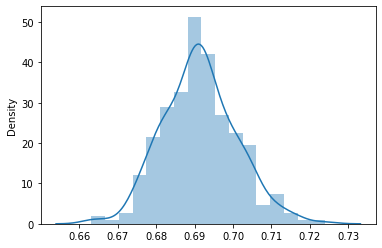

######### 16 번째 데이터 학습 결과 #########


SEED는 :     0   F1스코어는 : 0.68866   최대 스코어는 : 0.68866   지금까지 평균스코어는 : 0.68866
SEED는 :     5   F1스코어는 : 0.71023   최대 스코어는 : 0.71023   지금까지 평균스코어는 : 0.69945
SEED는 :    20   F1스코어는 : 0.68678   최대 스코어는 : 0.71023   지금까지 평균스코어는 : 0.69523
SEED는 :    45   F1스코어는 : 0.70213   최대 스코어는 : 0.71023   지금까지 평균스코어는 : 0.69695
SEED는 :    80   F1스코어는 : 0.71490   최대 스코어는 : 0.71490   지금까지 평균스코어는 : 0.70054
SEED는 :   125   F1스코어는 : 0.67268   최대 스코어는 : 0.71490   지금까지 평균스코어는 : 0.69590
SEED는 :   180   F1스코어는 : 0.68876   최대 스코어는 : 0.71490   지금까지 평균스코어는 : 0.69488
SEED는 :   245   F1스코어는 : 0.70094   최대 스코어는 : 0.71490   지금까지 평균스코어는 : 0.69564
SEED는 :   320   F1스코어는 : 0.68772   최대 스코어는 : 0.71490   지금까지 평균스코어는 : 0.69476
SEED는 :   405   F1스코어는 : 0.69635   최대 스코어는 : 0.71490   지금까지 평균스코어는 : 0.69492
SEED는 :   500   F1스코어는 : 0.69071   최대 스코어는 : 0.71490   지금까지 평균스코어는 : 0.69453
SEED는 :   605   F1스코어는 : 0.69450   최대 스코어는 : 0.71490   지금까지 평균스코어는 : 0.69453
SEED는 :   720   F1스코어는 : 0.69591   최대 스코어는 : 0.71490   지금까지 평균스코어는 : 0.69464

SEED는 : 57245   F1스코어는 : 0.69352   최대 스코어는 : 0.71895   지금까지 평균스코어는 : 0.69102
SEED는 : 58320   F1스코어는 : 0.68223   최대 스코어는 : 0.71895   지금까지 평균스코어는 : 0.69094
SEED는 : 59405   F1스코어는 : 0.68098   최대 스코어는 : 0.71895   지금까지 평균스코어는 : 0.69085
SEED는 : 60500   F1스코어는 : 0.68194   최대 스코어는 : 0.71895   지금까지 평균스코어는 : 0.69077
SEED는 : 61605   F1스코어는 : 0.67645   최대 스코어는 : 0.71895   지금까지 평균스코어는 : 0.69064
SEED는 : 62720   F1스코어는 : 0.69029   최대 스코어는 : 0.71895   지금까지 평균스코어는 : 0.69064
SEED는 : 63845   F1스코어는 : 0.69320   최대 스코어는 : 0.71895   지금까지 평균스코어는 : 0.69066
SEED는 : 64980   F1스코어는 : 0.68795   최대 스코어는 : 0.71895   지금까지 평균스코어는 : 0.69064
SEED는 : 66125   F1스코어는 : 0.69191   최대 스코어는 : 0.71895   지금까지 평균스코어는 : 0.69065
SEED는 : 67280   F1스코어는 : 0.68419   최대 스코어는 : 0.71895   지금까지 평균스코어는 : 0.69059
SEED는 : 68445   F1스코어는 : 0.69945   최대 스코어는 : 0.71895   지금까지 평균스코어는 : 0.69067
SEED는 : 69620   F1스코어는 : 0.68711   최대 스코어는 : 0.71895   지금까지 평균스코어는 : 0.69064
SEED는 : 70805   F1스코어는 : 0.69449   최대 스코어는 : 0.71895   지금까지 평균스코어는 : 0.69067

SEED는 : 226845   F1스코어는 : 0.71155   최대 스코어는 : 0.71993   지금까지 평균스코어는 : 0.69045
SEED는 : 228980   F1스코어는 : 0.70479   최대 스코어는 : 0.71993   지금까지 평균스코어는 : 0.69051
SEED는 : 231125   F1스코어는 : 0.70806   최대 스코어는 : 0.71993   지금까지 평균스코어는 : 0.69059
SEED는 : 233280   F1스코어는 : 0.70174   최대 스코어는 : 0.71993   지금까지 평균스코어는 : 0.69065
SEED는 : 235445   F1스코어는 : 0.69442   최대 스코어는 : 0.71993   지금까지 평균스코어는 : 0.69066
SEED는 : 237620   F1스코어는 : 0.68533   최대 스코어는 : 0.71993   지금까지 평균스코어는 : 0.69064
SEED는 : 239805   F1스코어는 : 0.67191   최대 스코어는 : 0.71993   지금까지 평균스코어는 : 0.69055
SEED는 : 242000   F1스코어는 : 0.69645   최대 스코어는 : 0.71993   지금까지 평균스코어는 : 0.69058
SEED는 : 244205   F1스코어는 : 0.70837   최대 스코어는 : 0.71993   지금까지 평균스코어는 : 0.69066
SEED는 : 246420   F1스코어는 : 0.67995   최대 스코어는 : 0.71993   지금까지 평균스코어는 : 0.69061
SEED는 : 248645   F1스코어는 : 0.67934   최대 스코어는 : 0.71993   지금까지 평균스코어는 : 0.69056
SEED는 : 250880   F1스코어는 : 0.69360   최대 스코어는 : 0.71993   지금까지 평균스코어는 : 0.69058
SEED는 : 253125   F1스코어는 : 0.69202   최대 스코어는 : 0.71993   지금까지 평균스

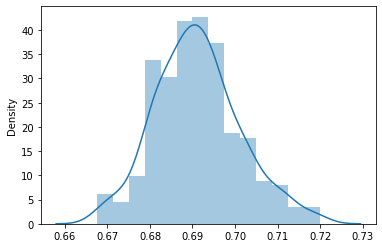

######### 17 번째 데이터 학습 결과 #########


SEED는 :     0   F1스코어는 : 0.69573   최대 스코어는 : 0.69573   지금까지 평균스코어는 : 0.69573
SEED는 :     5   F1스코어는 : 0.70486   최대 스코어는 : 0.70486   지금까지 평균스코어는 : 0.70029
SEED는 :    20   F1스코어는 : 0.68790   최대 스코어는 : 0.70486   지금까지 평균스코어는 : 0.69616
SEED는 :    45   F1스코어는 : 0.70553   최대 스코어는 : 0.70553   지금까지 평균스코어는 : 0.69850
SEED는 :    80   F1스코어는 : 0.71398   최대 스코어는 : 0.71398   지금까지 평균스코어는 : 0.70160
SEED는 :   125   F1스코어는 : 0.67066   최대 스코어는 : 0.71398   지금까지 평균스코어는 : 0.69644
SEED는 :   180   F1스코어는 : 0.67913   최대 스코어는 : 0.71398   지금까지 평균스코어는 : 0.69397
SEED는 :   245   F1스코어는 : 0.69260   최대 스코어는 : 0.71398   지금까지 평균스코어는 : 0.69380
SEED는 :   320   F1스코어는 : 0.68855   최대 스코어는 : 0.71398   지금까지 평균스코어는 : 0.69322
SEED는 :   405   F1스코어는 : 0.69979   최대 스코어는 : 0.71398   지금까지 평균스코어는 : 0.69387
SEED는 :   500   F1스코어는 : 0.69227   최대 스코어는 : 0.71398   지금까지 평균스코어는 : 0.69373
SEED는 :   605   F1스코어는 : 0.70340   최대 스코어는 : 0.71398   지금까지 평균스코어는 : 0.69453
SEED는 :   720   F1스코어는 : 0.69632   최대 스코어는 : 0.71398   지금까지 평균스코어는 : 0.69467

SEED는 : 57245   F1스코어는 : 0.69062   최대 스코어는 : 0.71398   지금까지 평균스코어는 : 0.69109
SEED는 : 58320   F1스코어는 : 0.68872   최대 스코어는 : 0.71398   지금까지 평균스코어는 : 0.69107
SEED는 : 59405   F1스코어는 : 0.69013   최대 스코어는 : 0.71398   지금까지 평균스코어는 : 0.69106
SEED는 : 60500   F1스코어는 : 0.67810   최대 스코어는 : 0.71398   지금까지 평균스코어는 : 0.69094
SEED는 : 61605   F1스코어는 : 0.68974   최대 스코어는 : 0.71398   지금까지 평균스코어는 : 0.69093
SEED는 : 62720   F1스코어는 : 0.69725   최대 스코어는 : 0.71398   지금까지 평균스코어는 : 0.69099
SEED는 : 63845   F1스코어는 : 0.69254   최대 스코어는 : 0.71398   지금까지 평균스코어는 : 0.69100
SEED는 : 64980   F1스코어는 : 0.68936   최대 스코어는 : 0.71398   지금까지 평균스코어는 : 0.69099
SEED는 : 66125   F1스코어는 : 0.68906   최대 스코어는 : 0.71398   지금까지 평균스코어는 : 0.69097
SEED는 : 67280   F1스코어는 : 0.67734   최대 스코어는 : 0.71398   지금까지 평균스코어는 : 0.69085
SEED는 : 68445   F1스코어는 : 0.70962   최대 스코어는 : 0.71398   지금까지 평균스코어는 : 0.69101
SEED는 : 69620   F1스코어는 : 0.68891   최대 스코어는 : 0.71398   지금까지 평균스코어는 : 0.69100
SEED는 : 70805   F1스코어는 : 0.68753   최대 스코어는 : 0.71398   지금까지 평균스코어는 : 0.69097

SEED는 : 226845   F1스코어는 : 0.70736   최대 스코어는 : 0.71398   지금까지 평균스코어는 : 0.69037
SEED는 : 228980   F1스코어는 : 0.70687   최대 스코어는 : 0.71398   지금까지 평균스코어는 : 0.69045
SEED는 : 231125   F1스코어는 : 0.70338   최대 스코어는 : 0.71398   지금까지 평균스코어는 : 0.69051
SEED는 : 233280   F1스코어는 : 0.69208   최대 스코어는 : 0.71398   지금까지 평균스코어는 : 0.69051
SEED는 : 235445   F1스코어는 : 0.69054   최대 스코어는 : 0.71398   지금까지 평균스코어는 : 0.69051
SEED는 : 237620   F1스코어는 : 0.68792   최대 스코어는 : 0.71398   지금까지 평균스코어는 : 0.69050
SEED는 : 239805   F1스코어는 : 0.66987   최대 스코어는 : 0.71398   지금까지 평균스코어는 : 0.69041
SEED는 : 242000   F1스코어는 : 0.69256   최대 스코어는 : 0.71398   지금까지 평균스코어는 : 0.69042
SEED는 : 244205   F1스코어는 : 0.70147   최대 스코어는 : 0.71398   지금까지 평균스코어는 : 0.69047
SEED는 : 246420   F1스코어는 : 0.67923   최대 스코어는 : 0.71398   지금까지 평균스코어는 : 0.69042
SEED는 : 248645   F1스코어는 : 0.67844   최대 스코어는 : 0.71398   지금까지 평균스코어는 : 0.69036
SEED는 : 250880   F1스코어는 : 0.69367   최대 스코어는 : 0.71398   지금까지 평균스코어는 : 0.69038
SEED는 : 253125   F1스코어는 : 0.70041   최대 스코어는 : 0.71398   지금까지 평균스

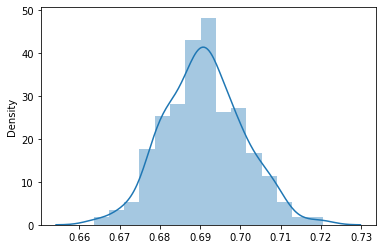

######### 18 번째 데이터 학습 결과 #########


SEED는 :     0   F1스코어는 : 0.69306   최대 스코어는 : 0.69306   지금까지 평균스코어는 : 0.69306
SEED는 :     5   F1스코어는 : 0.71704   최대 스코어는 : 0.71704   지금까지 평균스코어는 : 0.70505
SEED는 :    20   F1스코어는 : 0.68305   최대 스코어는 : 0.71704   지금까지 평균스코어는 : 0.69772
SEED는 :    45   F1스코어는 : 0.70563   최대 스코어는 : 0.71704   지금까지 평균스코어는 : 0.69970
SEED는 :    80   F1스코어는 : 0.69927   최대 스코어는 : 0.71704   지금까지 평균스코어는 : 0.69961
SEED는 :   125   F1스코어는 : 0.67411   최대 스코어는 : 0.71704   지금까지 평균스코어는 : 0.69536
SEED는 :   180   F1스코어는 : 0.67786   최대 스코어는 : 0.71704   지금까지 평균스코어는 : 0.69286
SEED는 :   245   F1스코어는 : 0.70689   최대 스코어는 : 0.71704   지금까지 평균스코어는 : 0.69461
SEED는 :   320   F1스코어는 : 0.69501   최대 스코어는 : 0.71704   지금까지 평균스코어는 : 0.69466
SEED는 :   405   F1스코어는 : 0.69903   최대 스코어는 : 0.71704   지금까지 평균스코어는 : 0.69510
SEED는 :   500   F1스코어는 : 0.69521   최대 스코어는 : 0.71704   지금까지 평균스코어는 : 0.69511
SEED는 :   605   F1스코어는 : 0.69454   최대 스코어는 : 0.71704   지금까지 평균스코어는 : 0.69506
SEED는 :   720   F1스코어는 : 0.68635   최대 스코어는 : 0.71704   지금까지 평균스코어는 : 0.69439

SEED는 : 57245   F1스코어는 : 0.69029   최대 스코어는 : 0.71704   지금까지 평균스코어는 : 0.69184
SEED는 : 58320   F1스코어는 : 0.68035   최대 스코어는 : 0.71704   지금까지 평균스코어는 : 0.69173
SEED는 : 59405   F1스코어는 : 0.67273   최대 스코어는 : 0.71704   지금까지 평균스코어는 : 0.69156
SEED는 : 60500   F1스코어는 : 0.67698   최대 스코어는 : 0.71704   지금까지 평균스코어는 : 0.69143
SEED는 : 61605   F1스코어는 : 0.67477   최대 스코어는 : 0.71704   지금까지 평균스코어는 : 0.69128
SEED는 : 62720   F1스코어는 : 0.69607   최대 스코어는 : 0.71704   지금까지 평균스코어는 : 0.69132
SEED는 : 63845   F1스코어는 : 0.68827   최대 스코어는 : 0.71704   지금까지 평균스코어는 : 0.69130
SEED는 : 64980   F1스코어는 : 0.69001   최대 스코어는 : 0.71704   지금까지 평균스코어는 : 0.69129
SEED는 : 66125   F1스코어는 : 0.69547   최대 스코어는 : 0.71704   지금까지 평균스코어는 : 0.69132
SEED는 : 67280   F1스코어는 : 0.67785   최대 스코어는 : 0.71704   지금까지 평균스코어는 : 0.69121
SEED는 : 68445   F1스코어는 : 0.70325   최대 스코어는 : 0.71704   지금까지 평균스코어는 : 0.69131
SEED는 : 69620   F1스코어는 : 0.68080   최대 스코어는 : 0.71704   지금까지 평균스코어는 : 0.69122
SEED는 : 70805   F1스코어는 : 0.70275   최대 스코어는 : 0.71704   지금까지 평균스코어는 : 0.69132

SEED는 : 226845   F1스코어는 : 0.71494   최대 스코어는 : 0.71704   지금까지 평균스코어는 : 0.69073
SEED는 : 228980   F1스코어는 : 0.70406   최대 스코어는 : 0.71704   지금까지 평균스코어는 : 0.69079
SEED는 : 231125   F1스코어는 : 0.71090   최대 스코어는 : 0.71704   지금까지 평균스코어는 : 0.69088
SEED는 : 233280   F1스코어는 : 0.69191   최대 스코어는 : 0.71704   지금까지 평균스코어는 : 0.69089
SEED는 : 235445   F1스코어는 : 0.69476   최대 스코어는 : 0.71704   지금까지 평균스코어는 : 0.69091
SEED는 : 237620   F1스코어는 : 0.68992   최대 스코어는 : 0.71704   지금까지 평균스코어는 : 0.69090
SEED는 : 239805   F1스코어는 : 0.67624   최대 스코어는 : 0.71704   지금까지 평균스코어는 : 0.69083
SEED는 : 242000   F1스코어는 : 0.70063   최대 스코어는 : 0.71704   지금까지 평균스코어는 : 0.69088
SEED는 : 244205   F1스코어는 : 0.70861   최대 스코어는 : 0.71704   지금까지 평균스코어는 : 0.69096
SEED는 : 246420   F1스코어는 : 0.68564   최대 스코어는 : 0.71704   지금까지 평균스코어는 : 0.69094
SEED는 : 248645   F1스코어는 : 0.67437   최대 스코어는 : 0.71704   지금까지 평균스코어는 : 0.69086
SEED는 : 250880   F1스코어는 : 0.68537   최대 스코어는 : 0.71704   지금까지 평균스코어는 : 0.69084
SEED는 : 253125   F1스코어는 : 0.68986   최대 스코어는 : 0.71704   지금까지 평균스

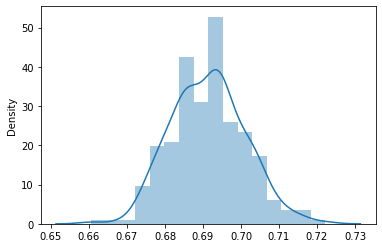

######### 19 번째 데이터 학습 결과 #########


ValueError: With n_samples=0, test_size=0.2 and train_size=None, the resulting train set will be empty. Adjust any of the aforementioned parameters.

In [118]:
#모델 생성 및 학습
from tqdm import tqdm_notebook
import lightgbm as lgb
SEED_LIST = []
for i in range(300):
    SEED_LIST.append(i*i*5)
print("시드리스트 : ",SEED_LIST)
print("-"*60)
print()


###학습시킬 데이터 종류

td = 1
for i in tqdm_notebook(new_data):
    
    s_L = []
    all_df = i
    print("#########",td,"번째 데이터 학습 결과 #########")
    td+=1
## 라벨인코딩및 데이터 분리
    for col in all_df.columns:
        if all_df[col].dtype == 'object':
            le = LabelEncoder()
            all_df[col] = le.fit_transform(all_df[col])
    train = all_df.iloc[:len(train),:]
    test = all_df.iloc[len(train):,:]
    X = train.drop(['income'],1)
    y = train['income']
    predictions = np.zeros(len(y))


    ### 중심극한정리  - 시드 상관없이 강력한 모델 찾기(lgbm기반)
    for i in tqdm_notebook(SEED_LIST) :
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state = i)
        Lgb = lgb.LGBMClassifier(
                                 silent=True, 
                                 max_depth=15,
                                 num_leaves=500,
                                 learning_rate = 0.15,
                                 objective='binary',
                                 metrics ='auc')
        model = Lgb.fit(X_train, y_train)
        predictions = model.predict(X_test)
        proba = model.predict_proba(X_test)
        score = f1_score(y_test, predictions)
        s_L.append(score)
        print("SEED는 : %5d"%i, "  F1스코어는 : %.5f" %score, "  최대 스코어는 : %.5f" %max(s_L), "  지금까지 평균스코어는 : %.5f"%(sum(s_L) / len(s_L)))
    
    print("-"*60)
    print()
    print("@@@@@@",td-1,"데이터 SCORE평균 : %.5f"%(sum(s_L) / len(s_L)),"@@@@@@")
    sns.distplot(s_L)
    plt.show()

In [75]:
all_df = name[15]

In [30]:
for col in all_df.columns:
    if all_df[col].dtype == 'object':            
        le = LabelEncoder()
        all_df[col] = le.fit_transform(all_df[col])
train = all_df.iloc[:len(train),:]
test = all_df.iloc[len(train):,:]
X = train.drop(['income'],1)
y = train['income']
predictions = np.zeros(len(y))

In [31]:
from sklearn.metrics import precision_score, recall_score, classification_report, f1_score, confusion_matrix
from sklearn.metrics import log_loss
from tqdm import tqdm_notebook
import lightgbm as lgbm

In [34]:
x_train, x_valid, y_train, y_valid = train_test_split(X, y, stratify=y, test_size=0.2, random_state=SEED)

In [35]:
NUM_BOOST_ROUND = 10000
N_SPLITS = 5

lgbm_param = {
    'objective': 'binary',
    'boosting_type':'gbdt',
    'colsample_bytree':1.0,
    'importance_type':'split',
    'learning_rate':0.1,
    'min_child_samples':20,
    'min_child_weight':0.001,
    'min_split_gain':0,
    'n_estimators':10000,
    'num_leaves':40,
    'random_state':SEED,
    'early_stopping_rounds': 200,
    'reg_alpha':0.6,
    'reg_lambda':0.5,
    'subsample':1.0,
    'subsample_for_bin':200000,
    'subsample_freq':0, 
    'n_jobs':-1, 
}

In [36]:
dtrain = lgbm.Dataset(x_train, y_train)
dvalid = lgbm.Dataset(x_valid, y_valid)

In [37]:
model = lgbm.train(lgbm_param, dtrain, NUM_BOOST_ROUND, 
                   valid_sets=(dtrain, dvalid), 
                   valid_names=('train', 'valid'), 
                   verbose_eval=100,
                  )

[LightGBM] [Warning] Unknown parameter: importance_type
[LightGBM] [Warning] Unknown parameter: importance_type
[LightGBM] [Info] Number of positive: 5038, number of negative: 15801
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004609 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1182
[LightGBM] [Info] Number of data points in the train set: 20839, number of used features: 22
[LightGBM] [Warning] Unknown parameter: importance_type
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.241758 -> initscore=-1.143064
[LightGBM] [Info] Start training from score -1.143064
Training until validation scores don't improve for 200 rounds
[100]	train's binary_logloss: 0.221667	valid's binary_logloss: 0.303335
[200]	train's binary_logloss: 0.188668	valid's binary_logloss: 0.309771
Early stopping, best iteration is:
[75]	train's binary_logloss: 0.234061	valid's binary_logloss: 0.302722


In [39]:
threshold = 0.5
valid_prediction = model.predict(x_valid)
valid_prediction[valid_prediction > threshold] = 1
valid_prediction[valid_prediction <= threshold] = 0
print(classification_report(y_valid, valid_prediction))

              precision    recall  f1-score   support

           0       0.89      0.93      0.91      3950
           1       0.75      0.64      0.69      1260

    accuracy                           0.86      5210
   macro avg       0.82      0.79      0.80      5210
weighted avg       0.86      0.86      0.86      5210



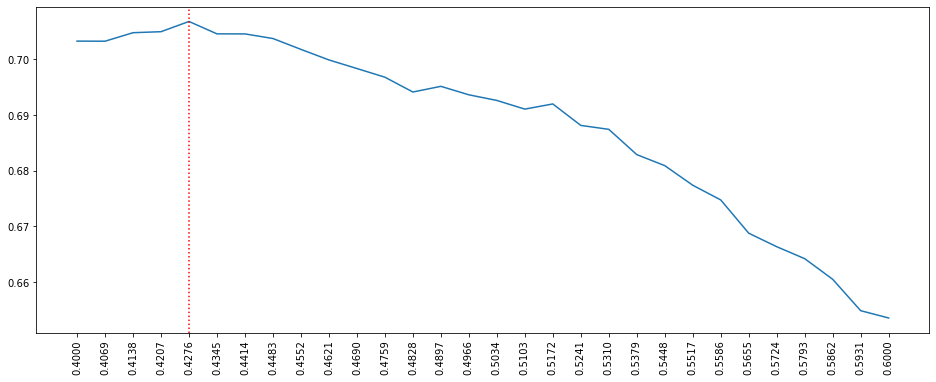

In [49]:
f1_threshold = np.linspace(0.4, 0.6, 30)
f1_scores = []
max_score = 0
max_threshold = 0

for t in f1_threshold:
    valid_prediction = model.predict(x_valid)
    valid_prediction[valid_prediction > t] = 1
    valid_prediction[valid_prediction <= t] = 0
    score_ = f1_score(y_valid, valid_prediction)
    f1_scores.append(score_)
    if score_ > max_score:
        max_score = score_
        max_threshold = t
        
plt.figure(figsize=(16, 6))
plt.plot(f1_threshold, f1_scores)
plt.axvline(x=max_threshold, linestyle=':', color='r')
plt.xticks(f1_threshold, rotation=90)
plt.show()

In [50]:
threshold = 0.4276
valid_prediction = model.predict(x_valid)
valid_prediction[valid_prediction > threshold] = 1
valid_prediction[valid_prediction <= threshold] = 0
print(classification_report(y_valid, valid_prediction))

              precision    recall  f1-score   support

           0       0.90      0.91      0.91      3950
           1       0.72      0.70      0.71      1260

    accuracy                           0.86      5210
   macro avg       0.81      0.80      0.81      5210
weighted avg       0.86      0.86      0.86      5210



In [76]:
all_data = all_df.copy()

In [77]:
education_map = {
    'Preschool': 'level_0', 
    '1st-4th': 'level_1', 
    '5th-6th': 'level_1', 
    '7th-8th': 'level_2', 
    '9th': 'level_2', 
    '10th': 'level_3', 
    '11th': 'level_3', 
    '12th': 'level_3', 
    'HS-grad': 'level_4', 
    'Some-college': 'level_5', 
    'Assoc-acdm': 'level_6', 
    'Assoc-voc': 'level_6', 
    'Bachelors': 'level_7', 
    'Masters': 'level_8', 
    'Prof-school': 'level_9', 
    'Doctorate': 'level_9',
}

In [17]:
all_data = name[15].copy()

In [154]:
all_data['education'] = all_data['education'].map(education_map)

In [155]:
all_data = all_data.drop('education_num', 1)

In [156]:
all_df['marital_status']

0        2
1        4
2        4
3        4
4        4
        ..
32556    2
32557    2
32558    2
32559    2
32560    0
Name: marital_status, Length: 32561, dtype: int32

In [157]:
all_data.loc[all_data['marital_status'] == 'Married-AF-spouse', 'marital_status'] = 'Married-civ-spouse'

In [158]:
all_data.loc[all_data['occupation'].isin(['Armed-Forces', 'Priv-house-serv']), 'occupation'] = 'Priv-house-serv'

In [159]:
all_data['capital_net'] = all_data['capital_gain'] - all_data['capital_loss']
train['capital_net'] = train['capital_gain'] - train['capital_loss']
test['capital_net'] = test['capital_gain'] - test['capital_loss']

In [160]:
pos_key = all_data.loc[(all_data['income'] == 1) & (all_data['capital_net'] > 0), 'capital_net'].value_counts().sort_index().keys().tolist()
all_key = all_data.loc[(all_data['income'] == 1) & (all_data['capital_net'] > 0), 'capital_net'].value_counts().sort_index().keys().tolist()
all_key.extend(all_data.loc[(all_data['income'] == 0) & (all_data['capital_net'] > 0), 'capital_net'].value_counts().sort_index().keys().tolist())
all_key[:5]

[3103, 4386, 4687, 4787, 4934]

In [161]:
pos_key = all_data.loc[(all_data['income'] == 1) & (all_data['capital_net'] > 0), 'capital_net'].value_counts().sort_index().keys().tolist()
neg_key = all_data.loc[(all_data['income'] == 0) & (all_data['capital_net'] > 0), 'capital_net'].value_counts().sort_index().keys().tolist()

In [162]:
capital_net_pos_key = [key for key in pos_key if key not in neg_key]
capital_net_neg_key = [key for key in neg_key if key not in pos_key]

In [163]:
all_data['capital_net_pos_key'] = all_data['capital_net'].apply(lambda x: x in capital_net_pos_key)
all_data['capital_net_neg_key'] = all_data['capital_net'].apply(lambda x: x in capital_net_neg_key)

In [164]:
income_01 = ['Jamaica',
 'Haiti',
 'Puerto-Rico',
 'Laos',
 'Thailand',
 'Ecuador',]

income_02 = ['Outlying-US(Guam-USVI-etc)',
 'Honduras',
 'Columbia',
 'Dominican-Republic',
 'Mexico',
 'Guatemala',
 'Portugal',
 'Trinadad&Tobago',
 'Nicaragua',
 'Peru',
 'Vietnam',
 'El-Salvador',]

income_03 = ['Poland',
 'Ireland',
 'South',
 'China',]

income_04 = [
    'United-States',
]
income_05 = [
 'Greece',
 'Scotland',
 'Cuba',
 'Hungary',
 'Hong',
 'Holand-Netherlands',
]
income_06 = [
 'Philippines',
 'Canada',
]
income_07 = [
 'England',
 'Germany',
]

income_08 = [
 'Italy',
 'India',
 'Japan',
 'France',
 'Yugoslavia',
 'Cambodia',
]

income_09 = [
 'Taiwan',
 'Iran',
]

income_other=['?', ]

In [165]:
def convert_country(x):
    if x in income_01:
        return 'income_01'
    elif x in income_02:
        return 'income_02'
    elif x in income_03:
        return 'income_03'
    elif x in income_04:
        return 'income_04'
    elif x in income_05:
        return 'income_05'
    elif x in income_06:
        return 'income_06'
    elif x in income_07:
        return 'income_07'
    elif x in income_08:
        return 'income_08'
    elif x in income_09:
        return 'income_09'
    else:
        return 'income_other'

In [166]:
all_data['country_bin'] = all_data['native_country'].apply(convert_country)

In [167]:
all_df = all_data.copy()

In [19]:
for col in all_df.columns:
    if all_df[col].dtype == 'object':            
        le = LabelEncoder()
        all_df[col] = le.fit_transform(all_df[col])
train = all_df.iloc[:len(train),:]
test = all_df.iloc[len(train):,:]
X = train.drop(['income'],1)
y = train['income']
predictions = np.zeros(len(y))

In [20]:
from sklearn.metrics import precision_score, recall_score, classification_report, f1_score, confusion_matrix
from sklearn.metrics import log_loss
from tqdm import tqdm_notebook
import lightgbm as lgbm

In [21]:
x_train, x_valid, y_train, y_valid = train_test_split(X, y, stratify=y, test_size=0.2, random_state=SEED)

In [171]:
NUM_BOOST_ROUND = 10000
N_SPLITS = 5

lgbm_param = {
    'objective': 'binary',
    'boosting_type':'gbdt',
    'colsample_bytree':1.0,
    'importance_type':'split',
    'learning_rate':0.1,
    'min_child_samples':20,
    'min_child_weight':0.001,
    'min_split_gain':0,
    'n_estimators':10000,
    'num_leaves':40,
    'random_state':SEED,
    'early_stopping_rounds': 200,
    'reg_alpha':0.6,
    'reg_lambda':0.5,
    'subsample':1.0,
    'subsample_for_bin':200000,
    'subsample_freq':0, 
    'n_jobs':-1, 
}

In [172]:
dtrain = lgbm.Dataset(x_train, y_train)
dvalid = lgbm.Dataset(x_valid, y_valid)

In [173]:
model = lgbm.train(lgbm_param, dtrain, NUM_BOOST_ROUND, 
                   valid_sets=(dtrain, dvalid), 
                   valid_names=('train', 'valid'), 
                   verbose_eval=100,
                  )

[LightGBM] [Warning] Unknown parameter: importance_type
[LightGBM] [Warning] Unknown parameter: importance_type
[LightGBM] [Info] Number of positive: 5038, number of negative: 15801
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001020 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1323
[LightGBM] [Info] Number of data points in the train set: 20839, number of used features: 25
[LightGBM] [Warning] Unknown parameter: importance_type
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.241758 -> initscore=-1.143064
[LightGBM] [Info] Start training from score -1.143064
Training until validation scores don't improve for 200 rounds
[100]	train's binary_logloss: 0.217911	valid's binary_logloss: 0.299802
[200]	train's binary_logloss: 0.185223	valid's binary_logloss: 0.306304
Early stopping, best iteration is:
[55]	train's binary_logloss: 0.

In [174]:
threshold = 0.5
valid_prediction = model.predict(x_valid)
valid_prediction[valid_prediction > threshold] = 1
valid_prediction[valid_prediction <= threshold] = 0
print(classification_report(y_valid, valid_prediction))
score_ = f1_score(y_valid, valid_prediction)
print(score_)

              precision    recall  f1-score   support

           0       0.89      0.93      0.91      3950
           1       0.76      0.64      0.69      1260

    accuracy                           0.86      5210
   macro avg       0.82      0.79      0.80      5210
weighted avg       0.86      0.86      0.86      5210

0.6922413793103448


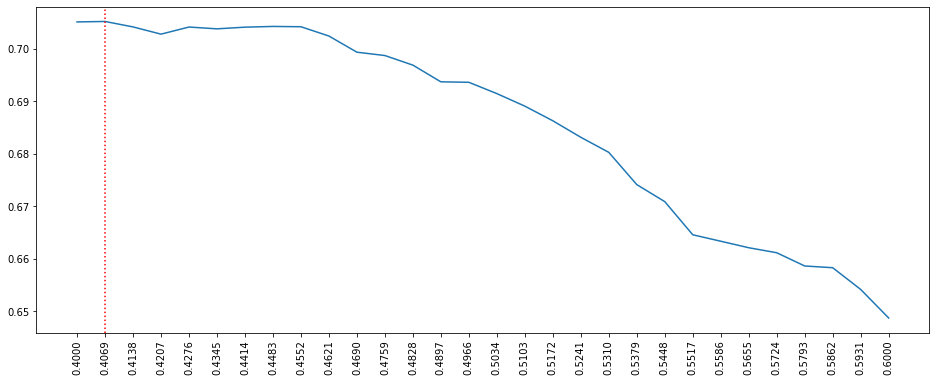

In [99]:
f1_threshold = np.linspace(0.4, 0.6, 30)
f1_scores = []
max_score = 0
max_threshold = 0

for t in f1_threshold:
    valid_prediction = model.predict(x_valid)
    valid_prediction[valid_prediction > t] = 1
    valid_prediction[valid_prediction <= t] = 0
    score_ = f1_score(y_valid, valid_prediction)
    f1_scores.append(score_)
    if score_ > max_score:
        max_score = score_
        max_threshold = t
        
plt.figure(figsize=(16, 6))
plt.plot(f1_threshold, f1_scores)
plt.axvline(x=max_threshold, linestyle=':', color='r')
plt.xticks(f1_threshold, rotation=90)
plt.show()

In [130]:
threshold = 0.4069
valid_prediction = model.predict(x_valid)
valid_prediction[valid_prediction > threshold] = 1
valid_prediction[valid_prediction <= threshold] = 0
print(classification_report(y_valid, valid_prediction))

              precision    recall  f1-score   support

           0       0.91      0.90      0.91      3950
           1       0.70      0.71      0.71      1260

    accuracy                           0.86      5210
   macro avg       0.80      0.81      0.81      5210
weighted avg       0.86      0.86      0.86      5210



In [26]:
all_df = data[0].copy()

for col in all_df.columns:
    if all_df[col].dtype == 'object':            
        le = LabelEncoder()
        all_df[col] = le.fit_transform(all_df[col])
train = all_df.iloc[:len(train),:]
test = all_df.iloc[len(train):,:]
X = train.drop(['income'],1)
y = train['income']
predictions = np.zeros(len(y))

from sklearn.metrics import precision_score, recall_score, classification_report, f1_score, confusion_matrix
from sklearn.metrics import log_loss
from tqdm import tqdm_notebook
import lightgbm as lgbm

x_train, x_valid, y_train, y_valid = train_test_split(X, y, stratify=y, test_size=0.2, random_state=SEED)

NUM_BOOST_ROUND = 10000
N_SPLITS = 5

lgbm_param = {
    'objective': 'binary',
    'boosting_type':'gbdt',
    'colsample_bytree':1.0,
    'importance_type':'split',
    'learning_rate':0.1,
    'min_child_samples':20,
    'min_child_weight':0.001,
    'min_split_gain':0,
    'n_estimators':10000,
    'num_leaves':40,
    'random_state':SEED,
    'early_stopping_rounds': 200,
    'reg_alpha':0.6,
    'reg_lambda':0.5,
    'subsample':1.0,
    'subsample_for_bin':200000,
    'subsample_freq':0, 
    'n_jobs':-1, 
}

dtrain = lgbm.Dataset(x_train, y_train)
dvalid = lgbm.Dataset(x_valid, y_valid)

model = lgbm.train(lgbm_param, dtrain, NUM_BOOST_ROUND, 
                   valid_sets=(dtrain, dvalid), 
                   valid_names=('train', 'valid'), 
                   verbose_eval=100,
                  )

[LightGBM] [Warning] Unknown parameter: importance_type
[LightGBM] [Warning] Unknown parameter: importance_type
[LightGBM] [Info] Number of positive: 5044, number of negative: 15795
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000936 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 681
[LightGBM] [Info] Number of data points in the train set: 20839, number of used features: 14
[LightGBM] [Warning] Unknown parameter: importance_type
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.242046 -> initscore=-1.141494
[LightGBM] [Info] Start training from score -1.141494
Training until validation scores don't improve for 200 rounds
[100]	train's binary_logloss: 0.230553	valid's binary_logloss: 0.284337
[200]	train's binary_logloss: 0.196705	valid's binary_logloss: 0.287248
Early stopping, best iteration is:
[85]	train's binary_logloss: 0.2

In [27]:
threshold = 0.5
valid_prediction = model.predict(x_valid)
valid_prediction[valid_prediction > threshold] = 1
valid_prediction[valid_prediction <= threshold] = 0
print(classification_report(y_valid, valid_prediction))
score_ = f1_score(y_valid, valid_prediction)
print(score_)

              precision    recall  f1-score   support

           0       0.90      0.94      0.92      3949
           1       0.78      0.66      0.71      1261

    accuracy                           0.87      5210
   macro avg       0.84      0.80      0.82      5210
weighted avg       0.87      0.87      0.87      5210

0.7132384648555412


In [149]:
import lightgbm as lgb
SEED_LIST = []
for i in range(300):
    SEED_LIST.append(i*i*5)

In [28]:
clf = xgb.XGBClassifier(
    n_estimators=500,
    max_depth=11,
    learning_rate=0.05,
    subsample=0.9,
    colsample_bytree=0.7,
    missing=-999,
    random_state=2020,
#     tree_method='gpu_hist'  # THE MAGICAL PARAMETER
)

In [29]:
%time clf.fit(x_train, y_train)

Wall time: 4.76 s


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.05, max_delta_step=0, max_depth=11,
              min_child_weight=1, missing=-999, monotone_constraints='()',
              n_estimators=500, n_jobs=0, num_parallel_tree=1,
              random_state=2020, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=0.9, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [30]:
threshold = 0.5
valid_prediction = clf.predict(x_valid)
valid_prediction[valid_prediction > threshold] = 1
valid_prediction[valid_prediction <= threshold] = 0
print(classification_report(y_valid, valid_prediction))
score_ = f1_score(y_valid, valid_prediction)
print(score_)

              precision    recall  f1-score   support

           0       0.89      0.94      0.91      3949
           1       0.76      0.63      0.69      1261

    accuracy                           0.86      5210
   macro avg       0.83      0.79      0.80      5210
weighted avg       0.86      0.86      0.86      5210

0.6926406926406925


In [1]:
data[0]

NameError: name 'data' is not defined

In [11]:
d1.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,40,Private,168538,HS-grad,9,Married-civ-spouse,Sales,Husband,White,Male,0,0,60,United-States,1
1,17,Private,101626,9th,5,Never-married,Machine-op-inspct,Own-child,White,Male,0,0,20,United-States,0
2,18,Private,353358,Some-college,10,Never-married,Other-service,Own-child,White,Male,0,0,16,United-States,0
3,21,Private,151158,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,25,United-States,0
4,24,Private,122234,Some-college,10,Never-married,Adm-clerical,Not-in-family,Black,Female,0,0,20,?,0


In [12]:
train.head()

,id,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,0,40,Private,168538,HS-grad,9,Married-civ-spouse,Sales,Husband,White,Male,0,0,60,United-States,1
1,1,17,Private,101626,9th,5,Never-married,Machine-op-inspct,Own-child,White,Male,0,0,20,United-States,0
2,2,18,Private,353358,Some-college,10,Never-married,Other-service,Own-child,White,Male,0,0,16,United-States,0
3,3,21,Private,151158,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,25,United-States,0
4,4,24,Private,122234,Some-college,10,Never-married,Adm-clerical,Not-in-family,Black,Female,0,0,20,?,0


In [36]:
train['education'].value_counts().index

Index(['HS-grad', 'Some-college', 'Bachelors', 'Masters', 'Assoc-voc', '11th',
       'Assoc-acdm', '10th', '7th-8th', 'Prof-school', '9th', '12th',
       'Doctorate', '5th-6th', '1st-4th', 'Preschool'],
      dtype='object')

In [34]:
train['education_num'].value_counts().index

Int64Index([9, 10, 13, 14, 11, 7, 12, 6, 4, 15, 5, 8, 16, 3, 2, 1], dtype='int64')

<AxesSubplot:xlabel='education_num', ylabel='count'>

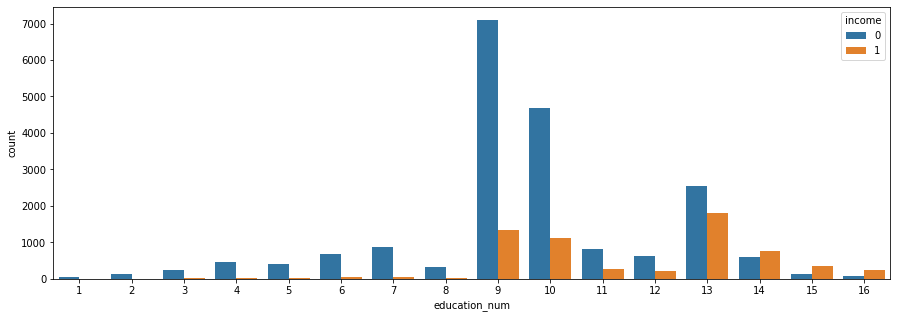

In [48]:
fig, ax = plt.subplots(figsize=(15,5))
sns.countplot(ax = ax,x='education_num',hue = 'income',data=train)

<AxesSubplot:xlabel='income', ylabel='count'>

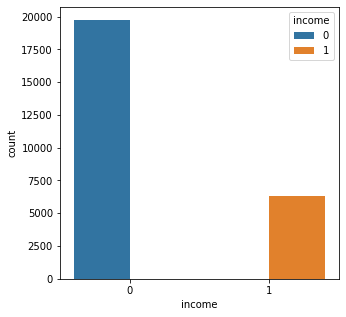

In [45]:
fig, ax = plt.subplots(figsize=(5,5))
sns.countplot(ax = ax,x='income',hue = 'income',data=train)

<AxesSubplot:xlabel='workclass', ylabel='count'>

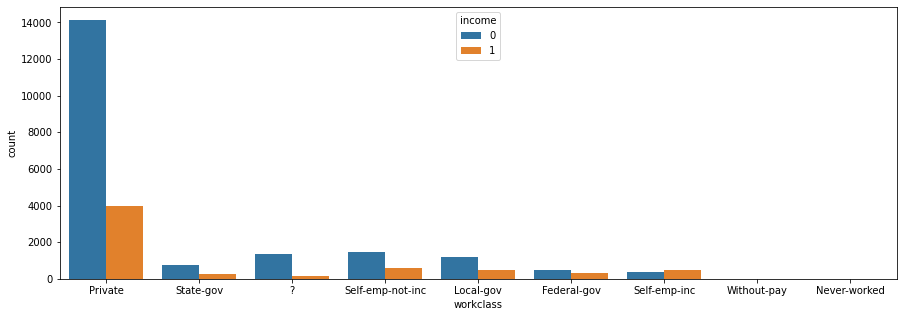

In [49]:
fig, ax = plt.subplots(figsize=(15,5))
sns.countplot(ax = ax,x='workclass',hue = 'income',data=train)

<AxesSubplot:xlabel='education', ylabel='count'>

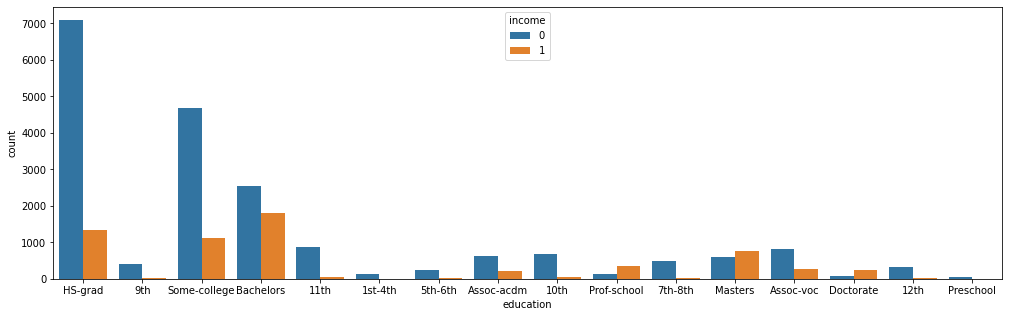

In [63]:
fig, ax = plt.subplots(figsize=(17,5))
sns.countplot(ax = ax,x='education',hue = 'income',data=train)

<AxesSubplot:xlabel='marital_status', ylabel='count'>

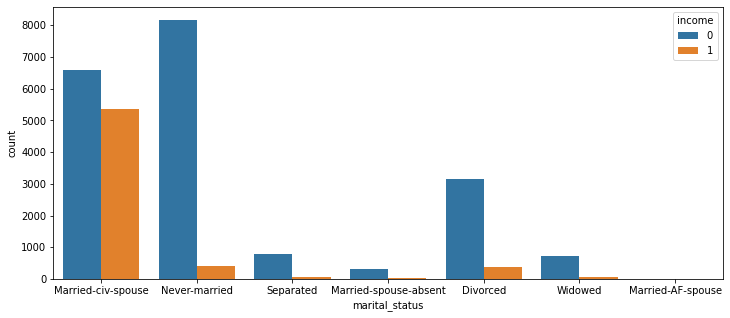

In [66]:
fig, ax = plt.subplots(figsize=(12,5))
sns.countplot(ax = ax,x='marital_status',hue = 'income',data=train)

<AxesSubplot:xlabel='occupation', ylabel='count'>

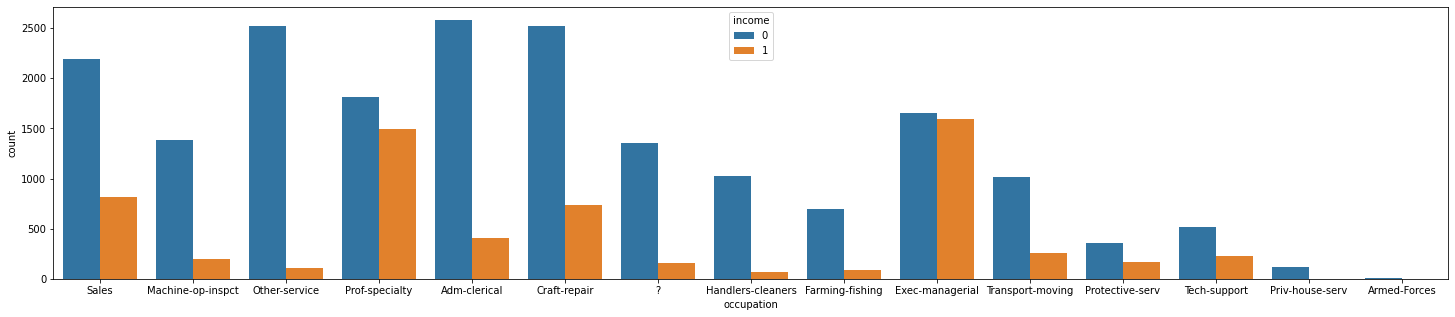

In [70]:
fig, ax = plt.subplots(figsize=(25,5))
sns.countplot(ax = ax,x='occupation',hue = 'income',data=train)

<AxesSubplot:xlabel='income', ylabel='fnlwgt'>

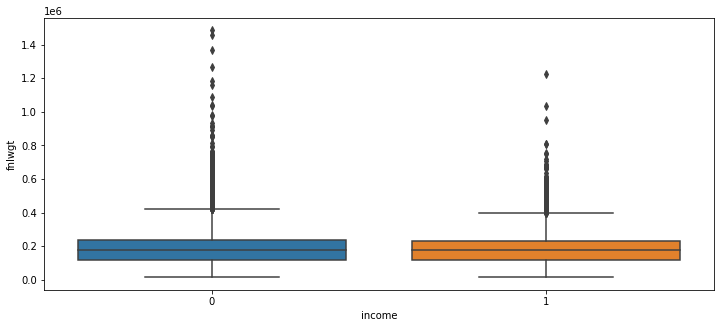

In [71]:
fig, ax = plt.subplots(figsize=(12,5))
sns.boxplot(ax = ax,x='income',y = 'fnlwgt',data=train)

<AxesSubplot:xlabel='income', ylabel='hours_per_week'>

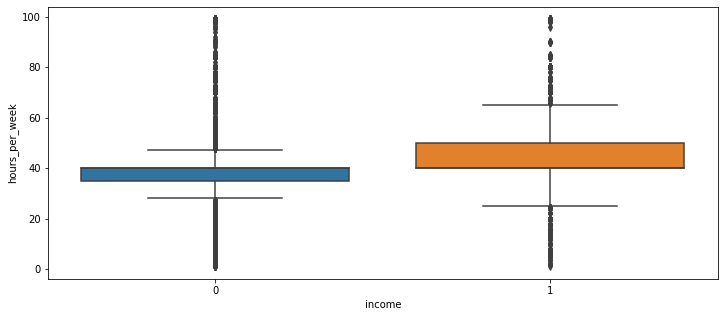

In [72]:
fig, ax = plt.subplots(figsize=(12,5))
sns.boxplot(ax = ax,x='income',y = 'hours_per_week',data=train)

<AxesSubplot:xlabel='relationship', ylabel='count'>

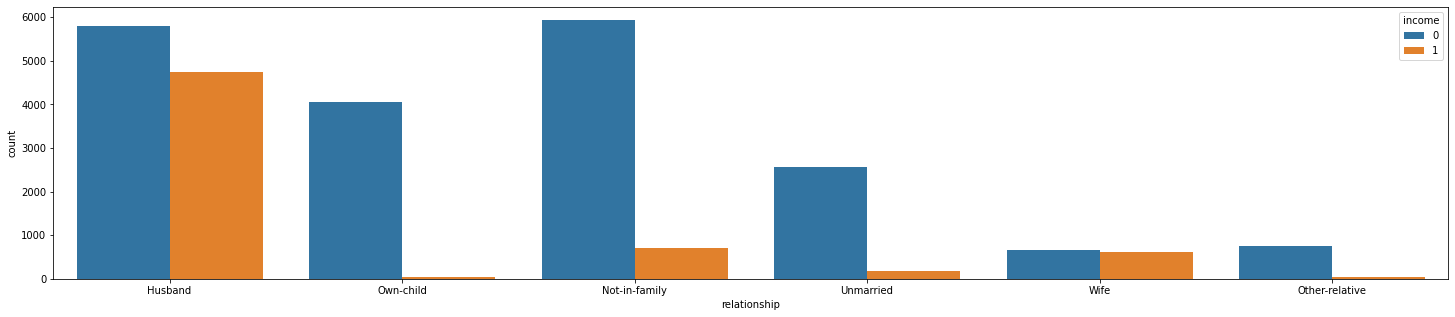

In [73]:
fig, ax = plt.subplots(figsize=(25,5))
sns.countplot(ax = ax,x='relationship',hue = 'income',data=train)

<AxesSubplot:xlabel='race', ylabel='count'>

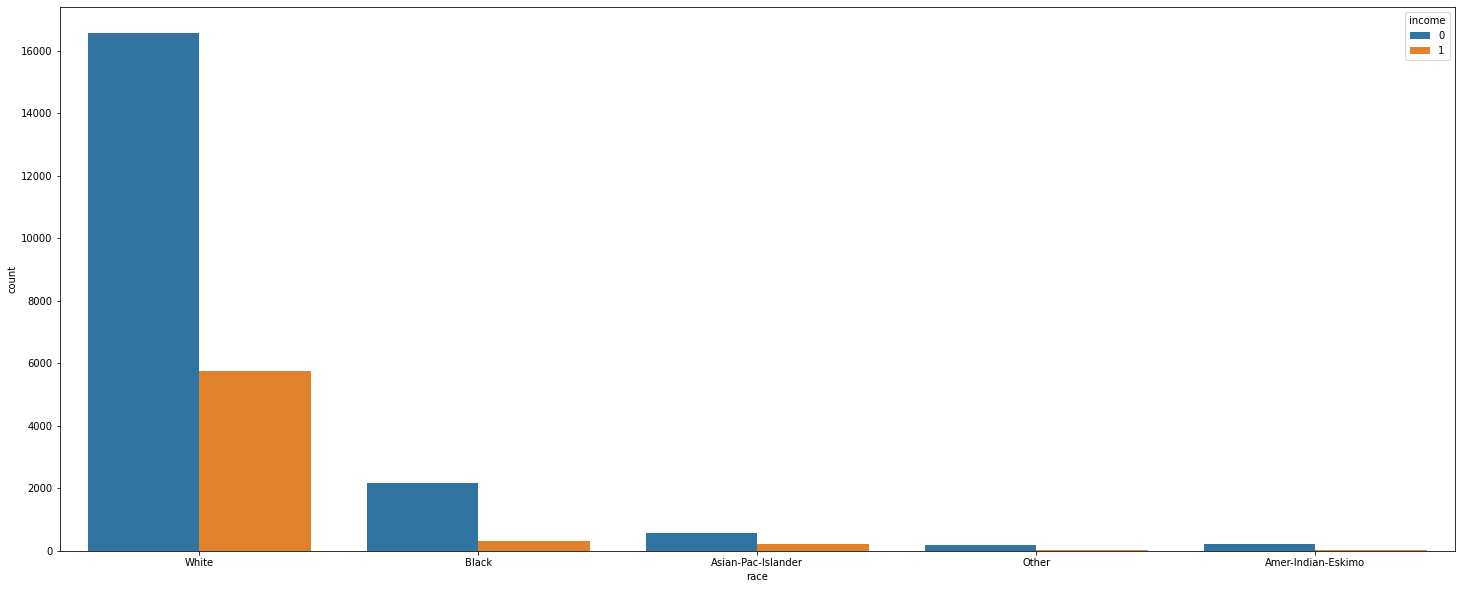

In [75]:
fig, ax = plt.subplots(figsize=(25,10))
sns.countplot(ax = ax,x='race',hue = 'income',data=train)

<AxesSubplot:xlabel='sex', ylabel='count'>

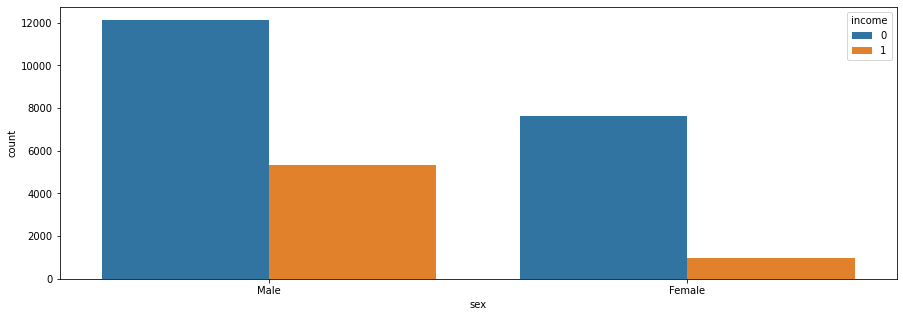

In [77]:
fig, ax = plt.subplots(figsize=(15,5))
sns.countplot(ax = ax,x='sex',hue = 'income',data=train)

<AxesSubplot:xlabel='income', ylabel='capital_gain'>

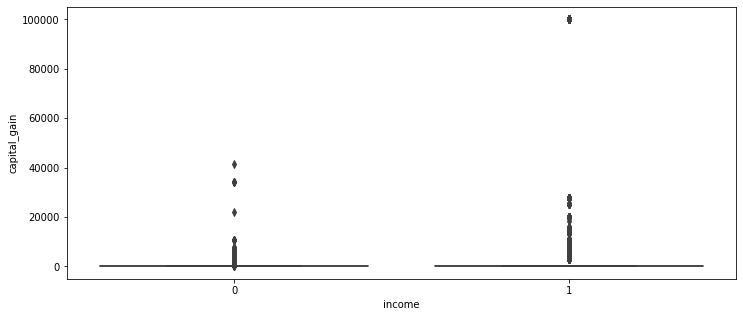

In [79]:
fig, ax = plt.subplots(figsize=(12,5))
sns.boxplot(ax = ax,x='income',y = 'capital_gain',data=train)

<AxesSubplot:xlabel='income', ylabel='capital_loss'>

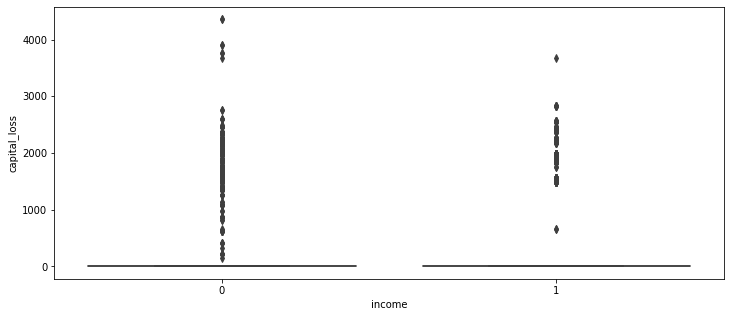

In [80]:
fig, ax = plt.subplots(figsize=(12,5))
sns.boxplot(ax = ax,x='income',y = 'capital_loss',data=train)

<AxesSubplot:xlabel='native_country', ylabel='count'>

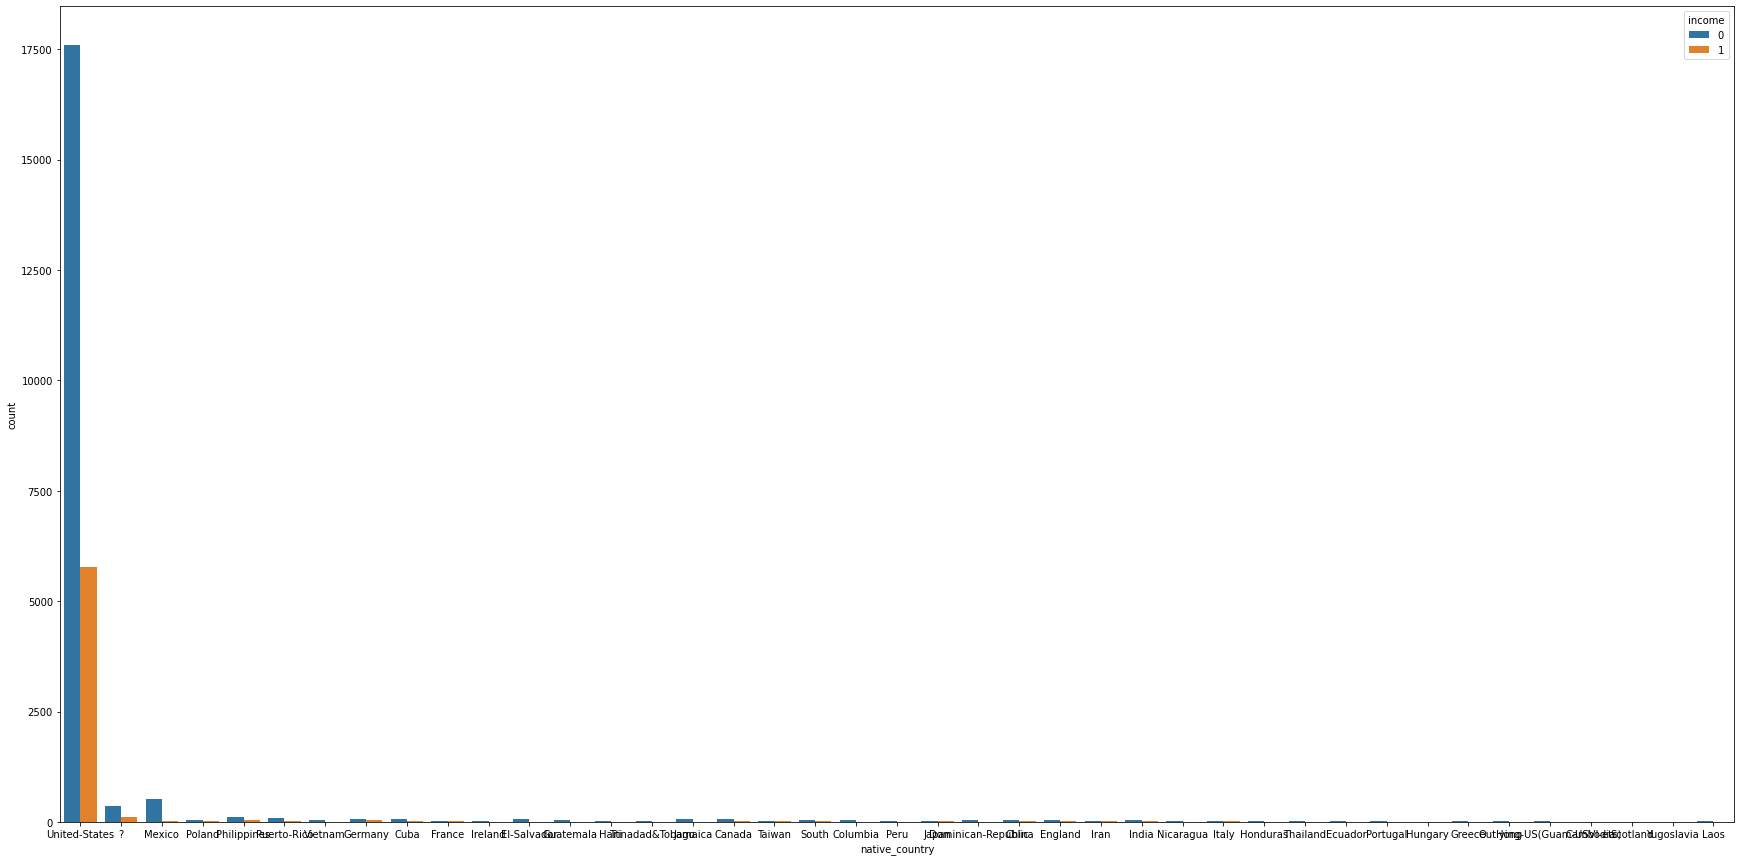

In [84]:
fig, ax = plt.subplots(figsize=(30,15))
sns.countplot(ax = ax,x='native_country',hue = 'income',data=train)

In [39]:
train.columns

Index(['id', 'age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income'],
      dtype='object')